# 1. Mercedes Benz Greener Energy Challenge 

Mercedes Benz is one of the leading car manufacturers in the entire
world and safety and reliability of the cars is of paramount importance.

To ensure each and every car configuration that is released by
mercedes-benz is safe and reliable they have an extensive and robust
testing system. But the time taken for testing of vehicles needs to be optimized, so mercedes-benz has released a kaggle competition to predict the time taken for each car configuration to pass the testing. Reducing the time taken to pass testing will help in Daimler reducing
the amount of carbon dioxide released into the environment without
reducing their quality standards. The provided dataset contains various car configurations with multiple variables for each configuration, each variable here corresponds to a
custom feature in the Mercedes car like 4WD, added air suspension,
or a head-up display. The features are either categorical or binary features and a numerical feature (i.e) time for testing.

This problem is a regression problem and we should predict the time taken for each of the car configurations to pass testing. 

### Metric:
The metric used for evaluation is R2 value which is also referred to as coefficient of determination, it is a metric that computes the proportion of variance between the actual and predicted values. It is computed as
follows,

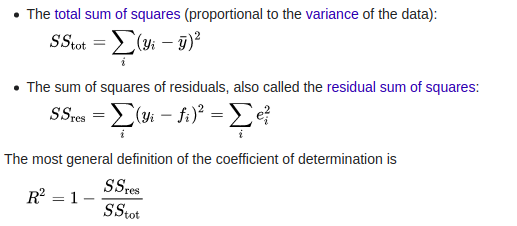
(Source Wikipedia)

Problem Statement - https://www.kaggle.com/c/mercedes-benz-greener-manufacturing

## 1.1 Reading the data and basic cleanup and information about dataset

In [1]:
# Importing the necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import PCA, FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.cluster import FeatureAgglomeration
import pickle
import operator

from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import r2_score

import eli5
from eli5.sklearn import PermutationImportance

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

/home/pritesh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/pritesh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Loading the train dataset into a train dataframe and printing the shape of the dataframe 
train = pd.read_csv('train.csv')
print(train.shape)
# Loading the test dataset into a test dataframe and printing the shape of the dataframe
test = pd.read_csv('test.csv')
test.shape

(4209, 378)


(4209, 377)

In [3]:
type(train.iloc[0])

pandas.core.series.Series

In [4]:
# Printing the head of the dataframe (first 5 rows) to visualoze the data present in the dataset 
train.head()

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...  X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...     0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...     1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...     0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...     0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...     0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 378 columns]

In [5]:
# Checking for any missing values in the train dataset 
train.isnull().values.any()

False

There are no missing values in the dataframe 

In [6]:
# Finding the value counts of the data types of the columns present in the dataset  
train.dtypes.value_counts()

int64      369
object       8
float64      1
dtype: int64

This shows us the various types of columns that are present in the dataset 
1. There are 369 columns belonging to integer data type.
2. There are 8 columns which are of object data type meaning they are categorical variables.
3. There is 1 column of float datatype which is the predicted label y column in the dataset.

In [7]:
categorical_features = [] 
# Looping through all the columnms in the dataset 
for i in train.columns:
    # Checking the data type of the column is 'object' which means the columns is a categorical feature
    if train[i].dtypes =='object':
        # Adding the feature to the categorical_features array
        categorical_features.append(i)
        # Printing the feature name and unique categorical features
        print(i,"\n",np.unique(train[i]))
        print('-'*100)

X0 
 ['a' 'aa' 'ab' 'ac' 'ad' 'af' 'ai' 'aj' 'ak' 'al' 'am' 'ao' 'ap' 'aq' 'as'
 'at' 'au' 'aw' 'ax' 'ay' 'az' 'b' 'ba' 'bc' 'c' 'd' 'e' 'f' 'g' 'h' 'i'
 'j' 'k' 'l' 'm' 'n' 'o' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']
----------------------------------------------------------------------------------------------------
X1 
 ['a' 'aa' 'ab' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p'
 'q' 'r' 's' 't' 'u' 'v' 'w' 'y' 'z']
----------------------------------------------------------------------------------------------------
X2 
 ['a' 'aa' 'ac' 'ae' 'af' 'ag' 'ah' 'ai' 'ak' 'al' 'am' 'an' 'ao' 'ap' 'aq'
 'ar' 'as' 'at' 'au' 'av' 'aw' 'ay' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j'
 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'x' 'y' 'z']
----------------------------------------------------------------------------------------------------
X3 
 ['a' 'b' 'c' 'd' 'e' 'f' 'g']
----------------------------------------------------------------------------------------------------
X4 
 ['a' 'b' 'c' 

There are 8 categorical variables present in the dataset along with the unique values in those columns in the train dataset

In [8]:
# declaring empty arrays to store the binary features 
columns_binary = [] 
columns_0 = [] 
columns_1 = []
binary_features_all = [] 

# Looping through all the columns in the train data frame
for i in train.columns:
    # Checking if the column data type is 'int64' because here binary features are integer data type
    if train[i].dtypes == 'int64':
        # Checking if the unique values in the column contain both 0 and 1 values and adding column name in list
        if (np.array_equal(np.unique(train[i]),[0,1])):
            columns_binary.append(i)
            binary_features_all.append(i)
        # Checking if the unique values in the column contains only 0 and adding the column name in a list
        elif (np.array_equal(np.unique(train[i]),[0])):
            columns_0.append(i)
            binary_features_all.append(i)
        # Checking if the unique values in the column contains only 1 and adding the column name in a list
        elif (np.array_equal(np.unique(train[i]),[1])):
            columns_1.append(i)
            binary_features_all.append(i)

# Printing the various columns and the number of columns of each type
print ("Columns with binary values [0,1]\n", columns_binary)
print ("Number of columns with binary features: ",len(columns_binary))
print('-'*100)
print ("Columns with only 0 values\n",columns_0)
print ("Number of columns with only 0: ",len(columns_0))
print('-'*100)
print("Columns with only 1 values\n",columns_1)
print ("Number of columns with only 1: ",len(columns_1))

Columns with binary values [0,1]
 ['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145', 'X146', 'X1

From the above code we can see that all the columns which are of integer datatypes are binary features except the 'ID' column which contains

1. The number of columns which contain both 0's and 1's values are 356.
2. The number of columns that contain onlu 0's as their values are 12 and hence they would not add much value to our model so we can drop those features. 
3. The number of columns with only 1 as their values is 0. 

In [9]:
# Creating a copy of train and test data to perform operations on them
train_df = train.copy()
test_df = test.copy()

### Label Encoding Categorical Features

In [10]:
# Looping through all the categorical features
for i in categorical_features:
    # Creating a labelEncoder object
    lbe = LabelEncoder()
    # Fitting the train and test values of categorical features to label encoder
    lbe.fit(pd.concat([train[i],test[i]], axis = 0, sort = False))
    # Transforming the train and test columns
    train_df[i] = lbe.transform(train[i])
    test_df[i] = lbe.transform(test[i])
    # Saving the LabelEncoder to a pickle file 
    filepath = i + '-LabelEncoder.pkl'
    pickle.dump(lbe,open(filepath,"wb"))

In [11]:
# Creating a XGBRegressor object
estimator = XGBRegressor()
# Fitting the Recursive Feature Elimination to find the top 5 features
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(train_df.drop(['y'],axis = 1),train_df['y'])
# Creating a dataframe of important features selected from RFE
imp_features = pd.DataFrame(selector.transform(train_df.drop(['y'],axis = 1)))
imp_features 

0  1  2  3  4
0     0  1  0  0  0
1     0  1  1  0  0
2     1  0  0  0  0
3     1  0  0  0  0
4     1  0  0  0  0
...  .. .. .. .. ..
4204  0  1  0  1  0
4205  0  1  0  1  0
4206  0  1  0  1  0
4207  0  0  1  0  0
4208  0  1  1  0  0

[4209 rows x 5 columns]

In [12]:
# Creating bins for the range of y values
bins = np.arange(70,280,10)
# Splitting the target variable into bins and adding them to the important features dataframe
y_bins = pd.cut(train_df['y'], bins = bins)
imp_features['y_bins'] = list(y_bins)
imp_features

0  1  2  3  4      y_bins
0     0  1  0  0  0  (130, 140]
1     0  1  1  0  0    (80, 90]
2     1  0  0  0  0    (70, 80]
3     1  0  0  0  0    (80, 90]
4     1  0  0  0  0    (70, 80]
...  .. .. .. .. ..         ...
4204  0  1  0  1  0  (100, 110]
4205  0  1  0  1  0  (100, 110]
4206  0  1  0  1  0  (100, 110]
4207  0  0  1  0  0    (80, 90]
4208  0  1  1  0  0  (110, 120]

[4209 rows x 6 columns]

## 1.2 Univariate Analysis of features in the dataset

### 1.2.1 Univariate analysis on categorical variables 

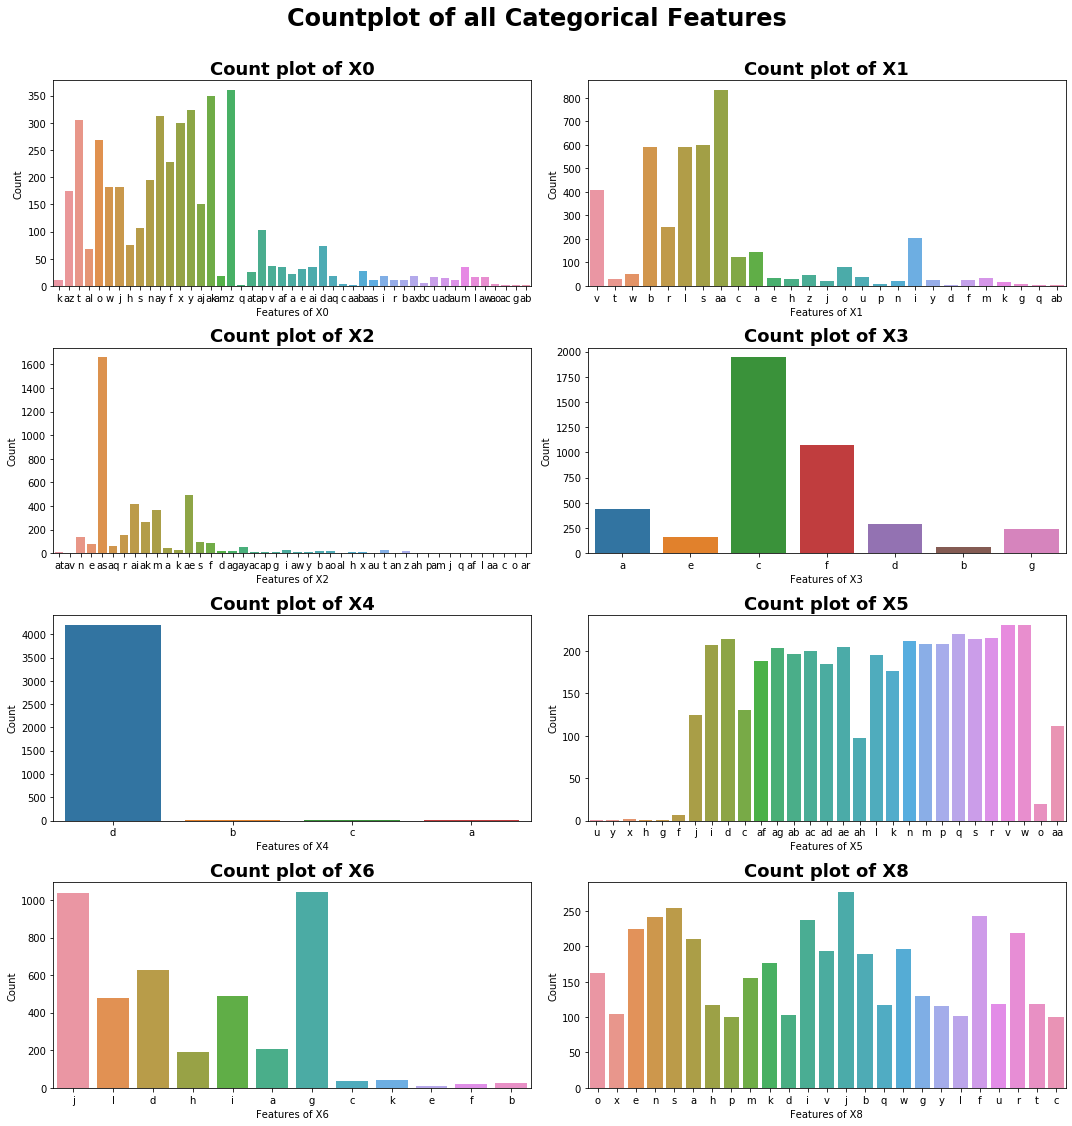

In [13]:
plt.figure(figsize = (15,15))
plt.suptitle("Countplot of all Categorical Features", fontweight = 'bold', fontsize = 24, y =1.04)

# Looping from 0 to 7 because the number of categorical features is 8
for i in range(8):
    # Creating a subplot
    plt.subplot(4,2,i+1)
    # Plotting a countplot
    sns.countplot(x = categorical_features[i], data = train)
    # Writing the xlabel, ylabel and title for each subplot of categorical features
    plt.xlabel("Features of "+categorical_features[i])
    plt.ylabel("Count")
    plt.title("Count plot of "+categorical_features[i],fontweight = 'bold', fontsize = 18)
    plt.tight_layout()

#### Count plot of X0 
This plot represents the count of each of the category in the categorical variable X0. 
From the plot we can see that all the categories are not equally distributed in X0 variable, categories z and al occur the maximum number of times around 350 times when compared to other categories and categories like g, ab, ac and ao occur the least number of times less than 10 number of times in the entire train data 

#### Count plot of X1
This plot represents the count of each of the category in the categorical variable X1. 
As we can see from the plot the categories are not equally distributed over the train data. We can see that category aa occurs the most number of times more than 800 times in the train dataset and categories like g, q, ab and d occur the leas number of times. 

#### Count plot of X2 
This plot represents the count of each of the category in the categorical variable X2. 
As we can see from the plot the categories are not equally distributed in the train dataset. We can see that category of 'as' occurs the most number of times almost 1600 times throughout the dataset and more than 60% of the other categories occur very negligible amount of times as the bar are very small we can assume that these variables occur less than 5 times in the entire dataset. 

#### Count plot of X3
This plot represents the count of each of the categories in the categorical variable X3. 
As we can see from the plot the categories are not equally distributed throughout the dataset. The category 'c' occurs almost 2000 times in the entire dataset and categories like 'b' occur arounf 70 times and category 'e' occur arounf 180 times in the dataset.

#### Count plot of X4
This plot represents the count of each of the category in the categorical varaible X4.
As we can see from the plot one category 'd' occurs more than 4000 times in the dataset and other categories 'b','c' and 'a' occurs only very very few times. 

#### Count plot of X5
This plot represents the count of each of the category in the categorical variable X5. 
As we can see from the plot most of the categories have almost equal counts in the dataset, around 200 times in the dataset. There are certain categories like 'u', 'y' ,'x', 'h', 'g' which occur very few times around 5 times in the entire dataset.

#### Count plot of X6 
This plot represents the count of each of the category in the categorical variable X6. 
From the plot we can see that categories like 'g' and 'j' occur around 1000 times in the dataset and categories like 'l', 'd' and 'i' occur around 500-600 times in the dataset and categories like 'c', 'k', 'e', 'f' and 'b' occur very few times in the dataset around 10-50 times. 

#### Count plot of X8
This plot represents the count of each of the category in the categorical variable X8.
From the plot we can see that each of the variables are almost equally distributed and none of the categories occur very few times in the dataset. We can see that category 'j' occurs the most number of times more than 250 times and whereas other variables are also present in and the least count of each category is 100.

### 1.2.2 Univariate Analysis of Binary Features

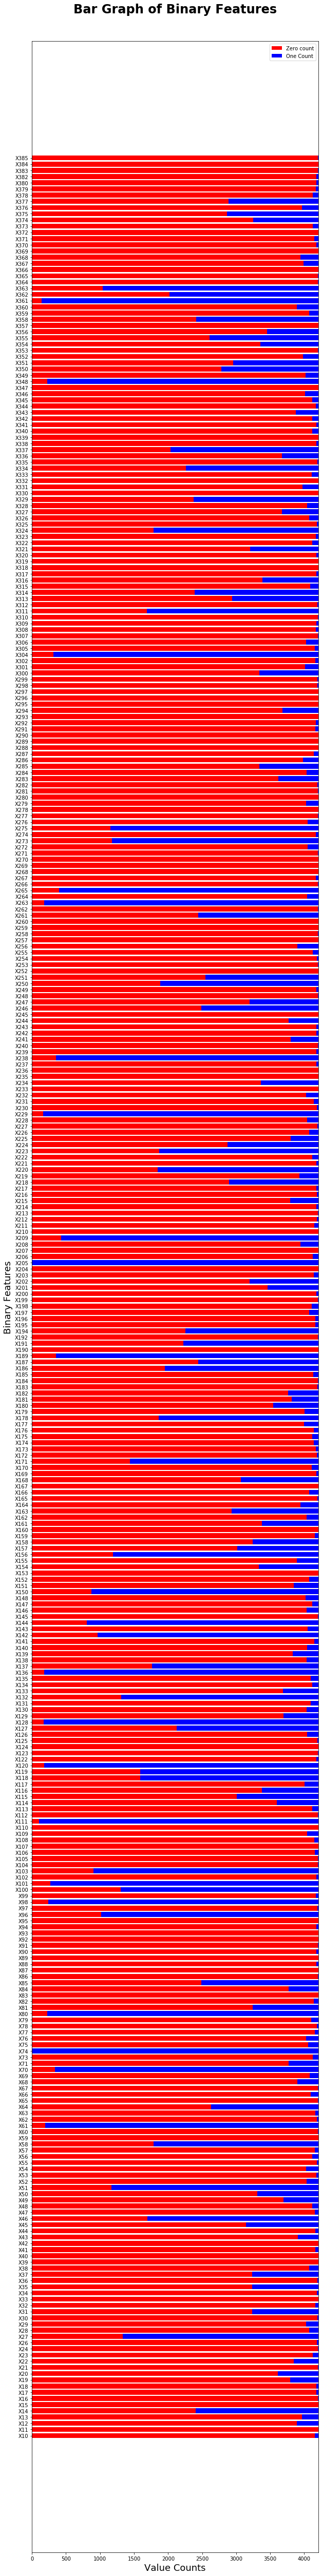

In [14]:
# Declaring arrays to store the number of 0's and 1's in binary features 
number_0 = [] 
number_1 = [] 

# Looping through all the binary features 
for i in binary_features_all:
    # Finding the value count 
    value_count = train[i].value_counts()
    # Adding the number of 0's to 0's array
    number_0.append(value_count[0])
    # Checking the the column contains 1's and adding them to the array
    if (len(value_count)==1):
        number_1.append(0)
    else:
        number_1.append(value_count[1])

        
plt.figure(figsize = (10,90))
# Plotting a bar graph of 0's and 1's 
p1 = plt.barh(np.arange(len(binary_features_all)),number_0, color = 'red')
p2 = plt.barh(np.arange(len(binary_features_all)),number_1, left = number_0,color = 'blue')
# Plotting a legend
plt.legend(('Zero count', 'One Count'))
plt.yticks(np.arange(len(binary_features_all)), binary_features_all)
# Plotting the xlabel, ylabel and title 
plt.xlabel("Value Counts",fontsize = 18)
plt.ylabel("Binary Features",fontsize = 18)
plt.title("Bar Graph of Binary Features",fontweight = 'bold',y = 1.01, fontsize = 24)
plt.show()

This plot represents the count of 0's and 1's in the binary features. 
1. From the plot there are certain variables which have equal distribution of 0's and 1's.
2. There are certain variables which contain only 0's value which is represented by the entire bar in 'red' color.
3. There are certain categories which have only very few 0 or 1 value which are presented by either 'red' or 'blue' color bar. 

Text(0.5, 1.0, '2d plot of y values')

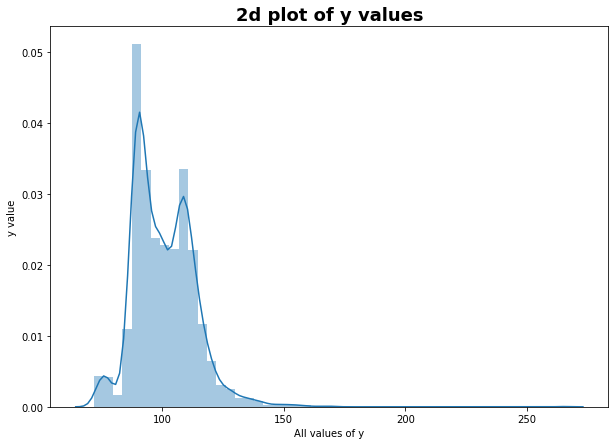

In [15]:
# Plotting a distribution plot of y train values
plt.figure(figsize = (10,7))
sns.distplot(train['y'])
# Plotting xlabel, ylabel and title of the plot
plt.xlabel("All values of y")
plt.ylabel("y value")
plt.title("2d plot of y values",fontweight = 'bold', fontsize = 18)

From this plot we can see that a very few values are above 150 so those values can be outliers, so we can remove those rows during feature extractions.

### 1.2.4 Univariate Analysis of Important features

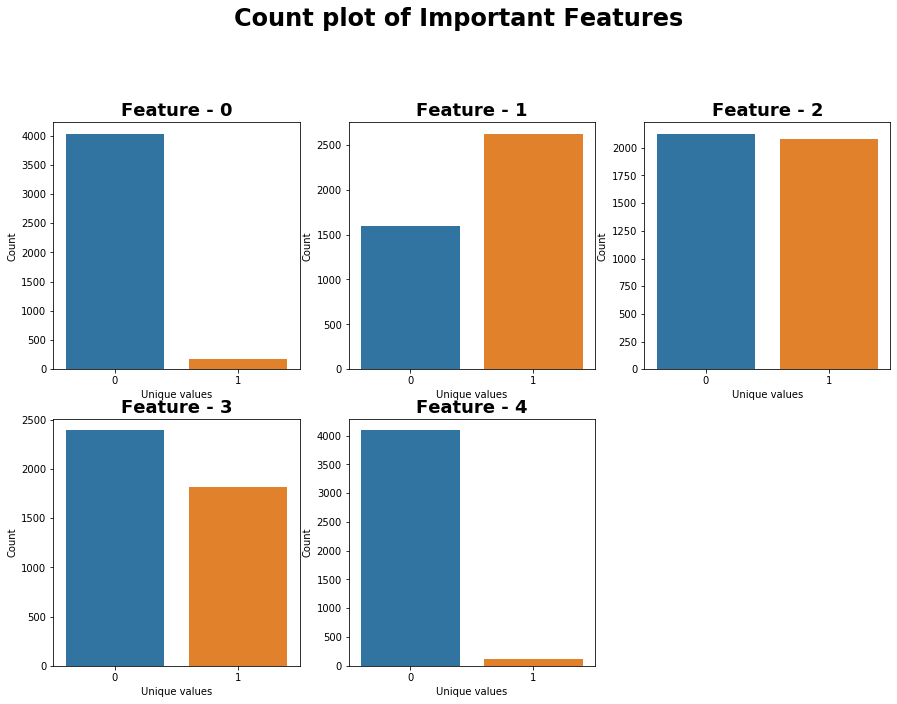

In [16]:
plt.figure(figsize =(15,10))
plt.suptitle('Count plot of Important Features', fontweight = 'bold', fontsize = 24, y =1.04)
# Looping through all the important features
for i in range(0, 5):
    # Creating a subplot
    plt.subplot(2,3,i+1)
    # Creating a countplot of important features
    sns.countplot(imp_features[i])
    # Plotting the title, xlabel and ylabel
    plt.title('Feature - '+str(i),fontweight = 'bold', fontsize = 18)
    plt.xlabel('Unique values')
    plt.ylabel('Count')
    

The above plot represents the count of 0's and 1's of the important features 

#### Feature - 1
We can see that the number of 0's in feature-1 is around 4000 and the number of 1's is around 200 which means that the number of 0's are much more than 1's. 

#### Feature -2 
The number of 1's in feature 2 is about 2600 and the number of 0's is around 1600 this shows that the number of 0's are more than number of 1's but the difference between them is not very high so we can say that the amount of 0's and 1's are present in the feature are not equal but when compare to feature-0 it is much better. 

#### Feature -3 
In this plot the number of 0's and 1's are almost equal so this feature contains almost the same amount of 0's and 1's for the data. 

#### Feature - 4
The number of 0's are aruond 2400 and the number of 1's are around 1800 so both 0 and 1 values are not equally distributed but there are both 0's and 1's in the data. 

#### Feature -5 
The number of 0's are more than 4000 and the number of 1's are around 200 which is far less when compares to the number of 1's in the data.

## 1.3 Bivariate Analysis

### 1.3.1 Bivariate Analysis on Categorical Features

Text(0, 0.5, 'y values')

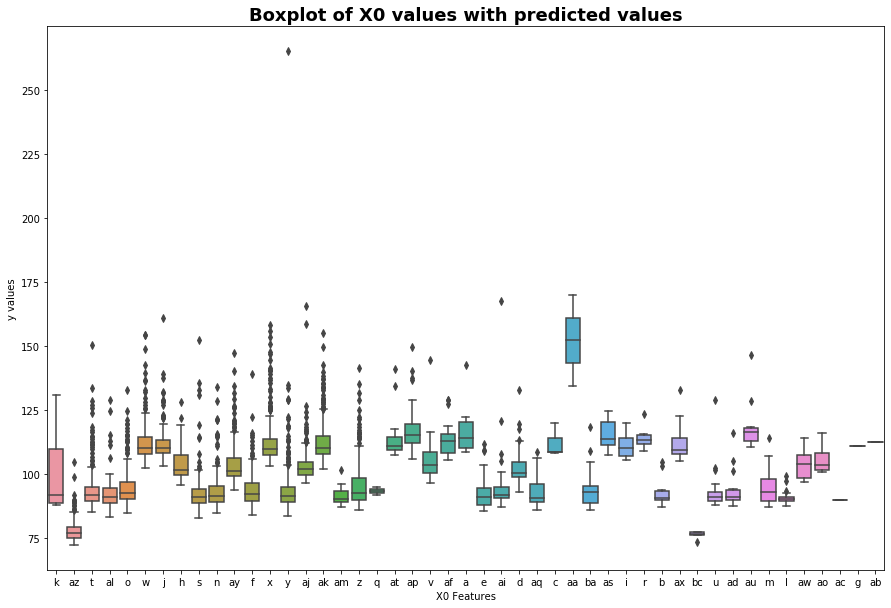

In [17]:
# Plotting a boxplot of categorical feature X0
plt.figure(figsize = (15,10))
sns.boxplot(x='X0', y='y', data = train)
# Plotting xlabel, ylabel and title of the plot
plt.title("Boxplot of X0 values with predicted values",fontweight = 'bold', fontsize = 18)
plt.xlabel("X0 Features")
plt.ylabel("y values")

This plot represents the box plot of the distribution of each of the categories in the categorical variable and the corresponding y value. 
1. The categorical value 'az' is having the least values for y around 75 with certain exception represented by the dots. 
2. The categorical variable 'bc' also has y value around 75 but the spread is much less than 'az'. 
3. The categorical values 'ac', 'g' and 'ab' have a constant value for y around 85, 110 and 115. 
4. 'aa' categorical variable is having the highest range around 140 to 160. 

Text(0, 0.5, 'y values')

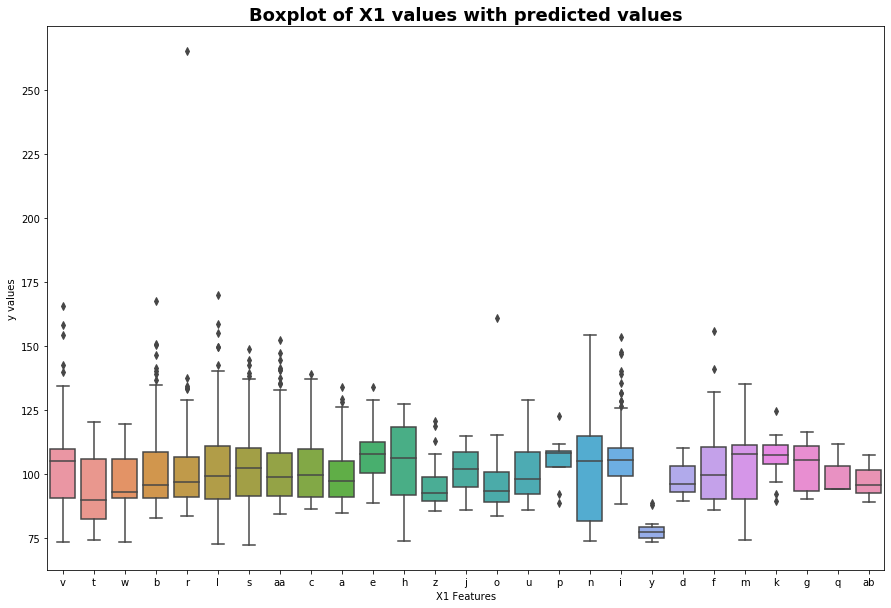

In [18]:
# Plotting a boxplot of categorical feature X1
plt.figure(figsize = (15,10))
sns.boxplot(x='X1', y='y', data = train)
# Plotting xlabel, ylabel and title of the plot
plt.title("Boxplot of X1 values with predicted values",fontweight = 'bold', fontsize = 18)
plt.xlabel("X1 Features")
plt.ylabel("y values")

This plot represents the boxplot of X1 feature with y value. 
1. As we can see from the boxplot all the categories except 'y' category are equally distributed with corresponding y value and have a range of arounf 80 to 130 with certain exceptions represented by dots.
2. 'y' category is having the lowest range of corresponding y value of 75 to 85.

Text(0, 0.5, 'y values')

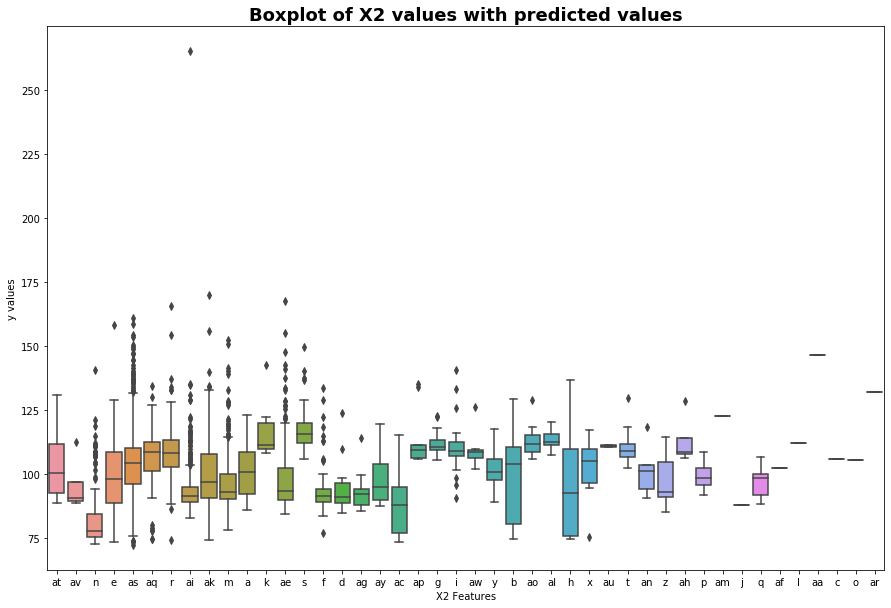

In [19]:
# Plotting a boxplot of categorical feature X2
plt.figure(figsize = (15,10))
sns.boxplot(x='X2', y='y', data = train)
# Plotting xlabel, ylabel and title of the plot
plt.title("Boxplot of X2 values with predicted values",fontweight = 'bold', fontsize = 18)
plt.xlabel("X2 Features")
plt.ylabel("y values")

This plor represents the boxplot of categorical feature X2 and y.
1. As we can see from the boxplots the categories 'b' and 'h' are spread over a large range of values y.
2. The categories 'p', 'am','af','I','aa','c','o' and 'ar' have only a single line in the boxplot because the amount of values in the category are very few and the single line represents that all these categories correspond to only a single value in y. 
3. The other categories are spread over a range of values of y as shown in the boxplot. 

Text(0, 0.5, 'y values')

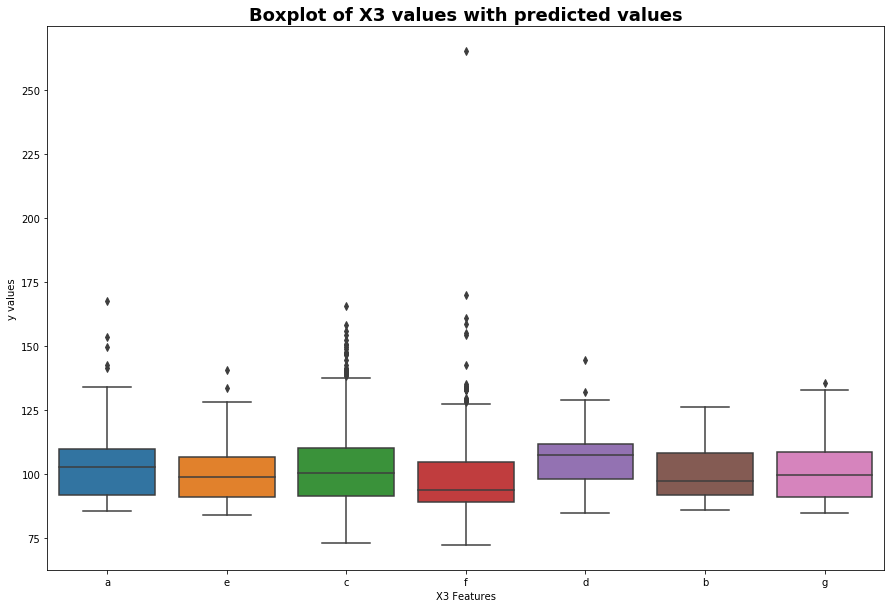

In [20]:
# Plotting a boxplot of categorical feature X3
plt.figure(figsize = (15,10))
sns.boxplot(x='X3', y='y', data = train)
# Plotting xlabel, ylabel and title of the plot
plt.title("Boxplot of X3 values with predicted values",fontweight = 'bold', fontsize = 18)
plt.xlabel("X3 Features")
plt.ylabel("y values")

This plot represents the boxplot of X3 feature with y.
1. As we can see from the plot that all the categories from the ategorical variable are equally distributed with value of y. 

Text(0, 0.5, 'y values')

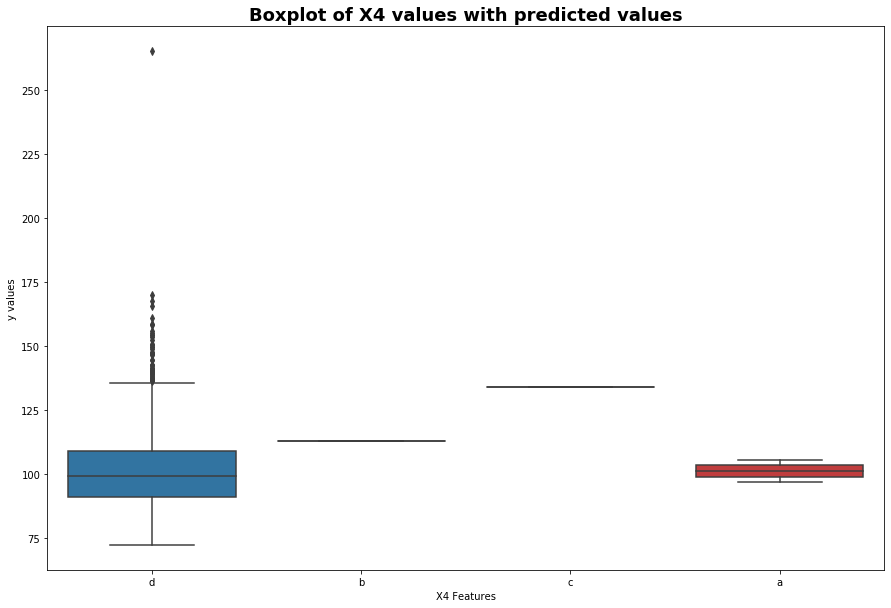

In [21]:
# Plotting a boxplot of categorical feature X4
plt.figure(figsize = (15,10))
sns.boxplot(x='X4', y='y', data = train)
# Plotting xlabel, ylabel and title of the plot
plt.title("Boxplot of X4 values with predicted values",fontweight = 'bold', fontsize = 18)
plt.xlabel("X4 Features")
plt.ylabel("y values")

This plot represents the boxplot of categorical feature X4 with y values. 
1. The category 'd' has the value sof y spread over a range 90 to 115 and ceratin values have a higher value of y.
2. Categories 'b' and 'c' have a constant value of y as the amount of values in these categories present in the dataset are also very few as seen from the countplot.
3. The category 'a' has a small spread of y values because the amount of rows containing these categories are very few in the dataset. 

Text(0, 0.5, 'y values')

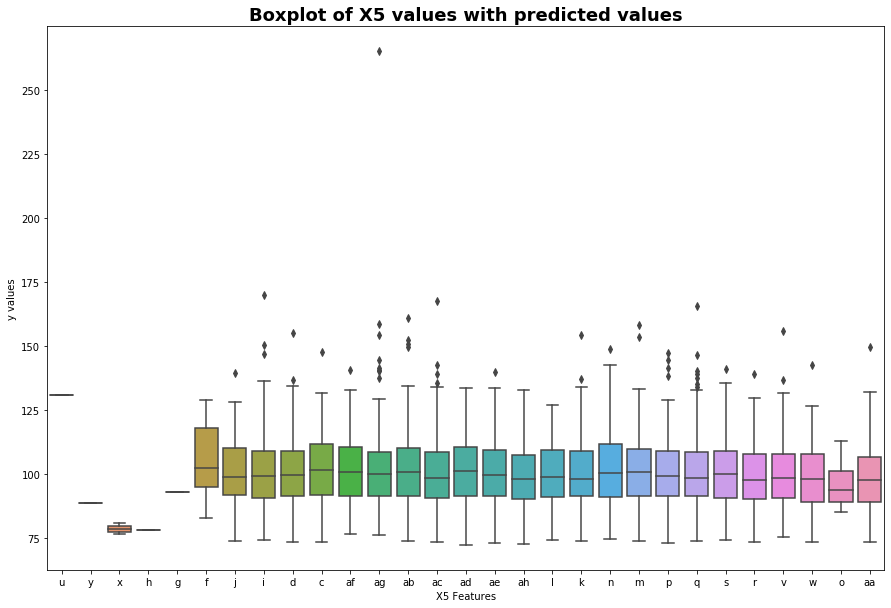

In [22]:
# Plotting a boxplot of categorical feature X5
plt.figure(figsize = (15,10))
sns.boxplot(x='X5', y='y', data = train)
# Plotting xlabel, ylabel and title of the plot
plt.title("Boxplot of X5 values with predicted values",fontweight = 'bold', fontsize = 18)
plt.xlabel("X5 Features")
plt.ylabel("y values")

This plot represents the boxplot of categorical feature X5 with y. 
1. Categories 'u','y','x','g' and 'h' have constant value of y because the number of rows containing these categories are low. 
2. The other categories are equally spread over the range of values of y.

Text(0, 0.5, 'y values')

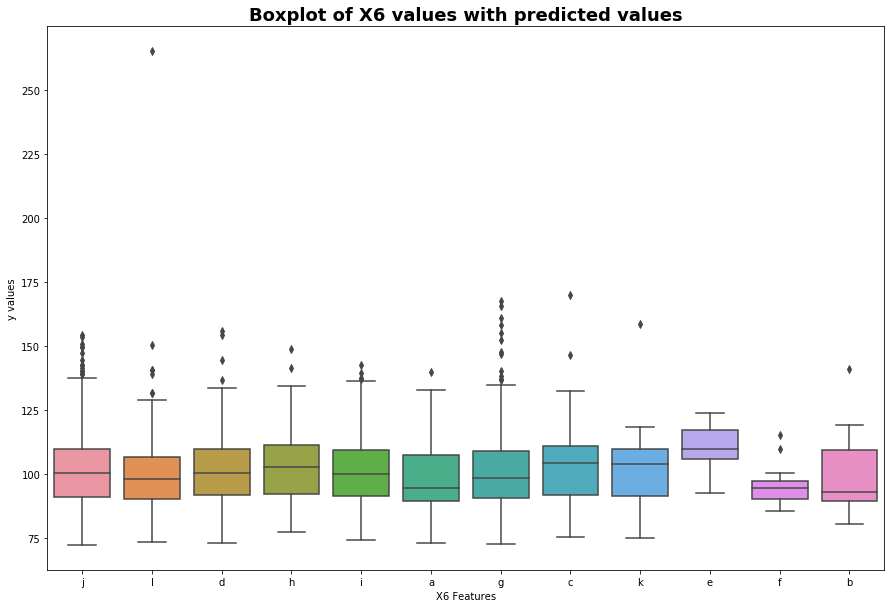

In [23]:
# Plotting a boxplot of categorical feature X6
plt.figure(figsize = (15,10))
sns.boxplot(x='X6', y='y', data = train)
# Plotting xlabel, ylabel and title of the plot
plt.title("Boxplot of X6 values with predicted values",fontweight = 'bold', fontsize = 18)
plt.xlabel("X6 Features")
plt.ylabel("y values")

This plot represents the boxplot of Categorical features X6 with y.
1. All the categories in X6 are equally spread over the range of values of y.

Text(0, 0.5, 'y values')

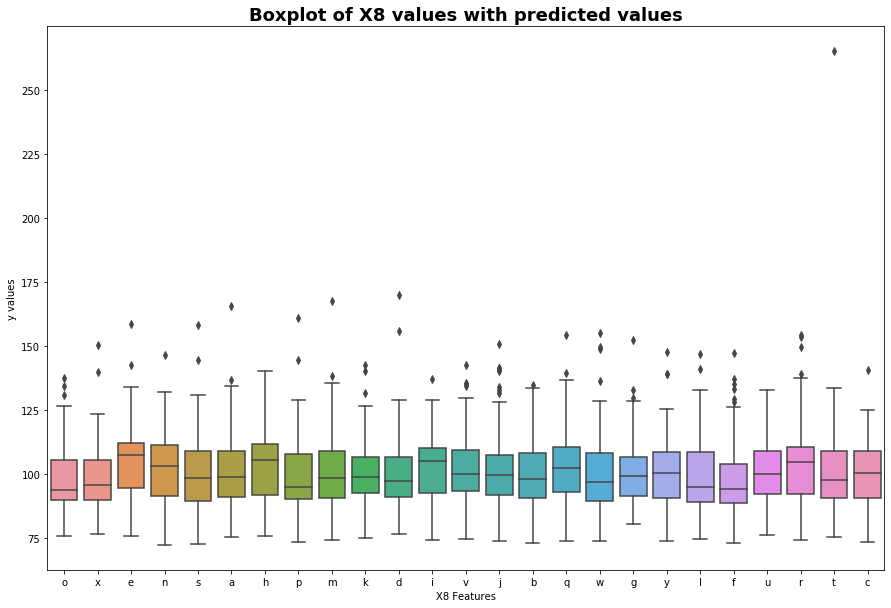

In [24]:
# Plotting a boxplot of categorical feature X8
plt.figure(figsize = (15,10))
sns.boxplot(x='X8', y='y', data = train)
# Plotting xlabel, ylabel and title of the plot
plt.title("Boxplot of X8 values with predicted values",fontweight = 'bold', fontsize = 18)
plt.xlabel("X8 Features")
plt.ylabel("y values")

This plot represents the boxplot of categorical features X8 and y.
1. As we can see from the plot all the categories in X8 are equally spread out with resepct to y with certain values above a range represented by dots. 

### 1.3.2 Bivariate Analysis of Important Features 

### Feature - 0

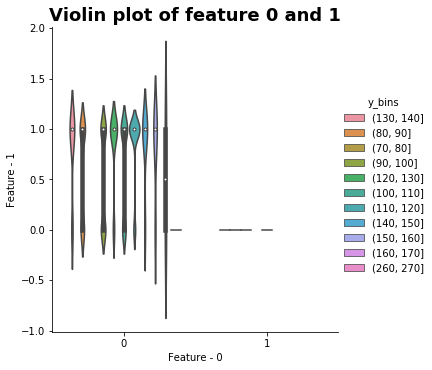

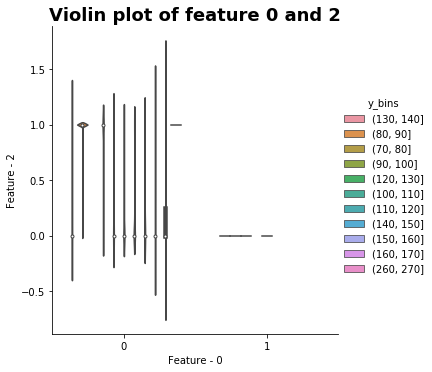

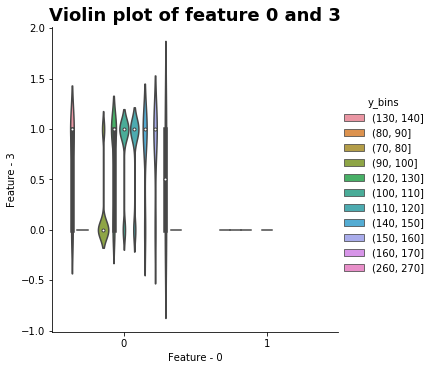

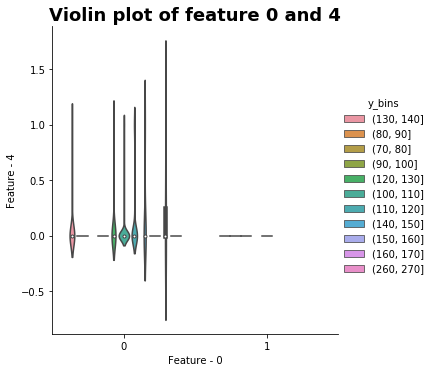

In [25]:
# Feature - 0
i = 0
# Looping through all the important features
for j in range (0,5):
    # Checking if the both i and j feature are the same 
    if (i!=j):
        # Plotting a violin plot of i and j feature
        sns.catplot(x= i,y=j, kind = 'violin', hue ='y_bins', data = imp_features)
        # Plotting the xlabel, ylabel and title
        plt.xlabel('Feature - '+str(i))
        plt.ylabel('Feature - '+str(j))
        plt.title('Violin plot of feature '+str(i)+' and '+str(j), fontweight = 'bold', fontsize = 18, y =1.04)
        plt.show()

The above plots represent the violin plot of feature-0 with all other features in the important features

#### Violin plot of feature 0 and feature 1
From the plot we can see that when the feature-0 and feature-1 are 0's the value of the target variable lies in the range of 80-120 as we can see from the color of the violin plots. And when feature-0 is 0 and feature-1 is 1 which occurs the most times as we can see from the size of the violin plots which represent the density that they occur and the target value lies in the range of 80-160. There is a single straight line in the violin plots when feature-0 is 1 and the feature-1 is 0 or 1 beause the number of 1's in feature-0 is very less as seen from the countplots of feature-0.

#### Violin plot of feature 0 and feature 2
From the plot we can see that when the feature-0 and feature-2 values are both 0 and 1 all the target values range 70-160 occurs when the values are 0 and 1. When the value of feature-0 is 1  and the value of feature-2 is either 0 or 1 we can see that there is a single line this occurs because the number of values with feature-0 as 1 is very few as seen from the countplot of feature-0.

#### Violin plot of feature 0 and feature 3
From the violin plot we can see that when the feature-0 and feature-3 is both 0 the target value lies in the range of 90-100 and when the feature-0 is 0 and feature-3 value is 1 the target value lies in the range of 70-90 and 100-160. When the value of feature-0 is 1  and the value of feature-3 is either 0 or 1 we can see that there is a single line this occurs because the number of values with feature-0 as 1 is very few as seen from the countplot of feature-0.

#### Violin plot of feature 0 and feature 4
From the violin plt we can see that when feature-0 and feature-4 are both 0's as 0's occur most number of times as seen from the countplots of both the feature the majority of the target variable range lie when both the features are 0 as seen from the violin plot.When the value of feature-0 is 1  and the value of feature-3 is either 0 or 1 we can see that there is a single line this occurs because the number of values with feature-0 as 1 is very few as seen from the countplot of feature-0.

### Feature - 1

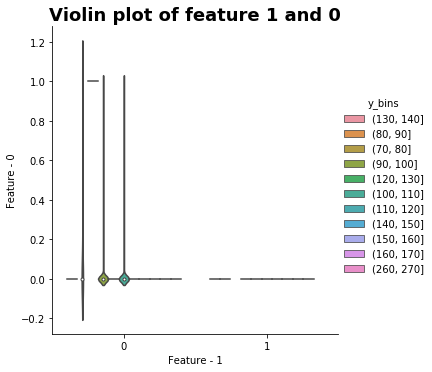

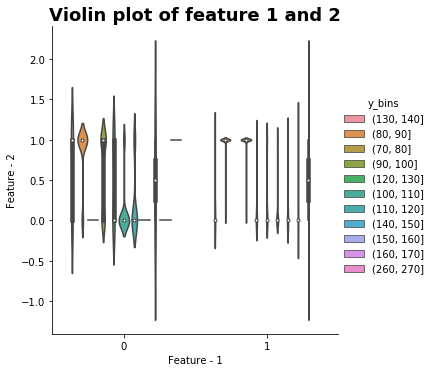

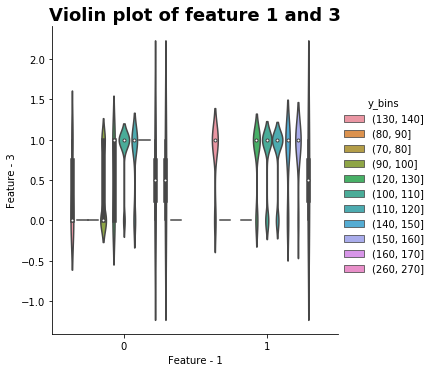

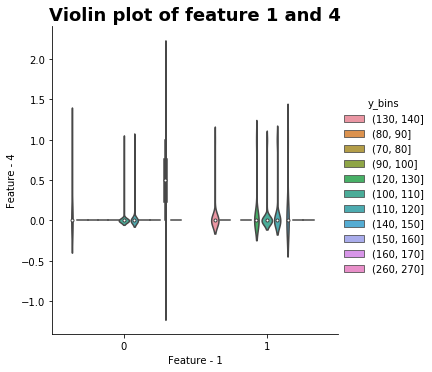

In [26]:
# Feature - 1
i = 1
# Looping through all the important features
for j in range (0,5):
    # Checking if the both i and j feature are the same 
    if (i!=j):
        # Plotting a violin plot of i and j feature
        sns.catplot(x= i,y=j, kind = 'violin', hue ='y_bins', data = imp_features)
        # Plotting the xlabel, ylabel and title
        plt.xlabel('Feature - '+str(i))
        plt.ylabel('Feature - '+str(j))
        plt.title('Violin plot of feature '+str(i)+' and '+str(j), fontweight = 'bold', fontsize = 18, y =1.04)
        plt.show()

These plots represent the violin plots of feature-1 with all other features in the important features
#### Violin plot of feature 1 and 0 
From the violin plot we can see that when both feature-0 and feature-1 are 0 most of the range of target variable occurs. The number of 1’s in feature-0 is very less hence the density cannot be plotted for when the feature-1 is 0 and feature-0 is 1. As we can see from the plot there are no occurance when both features are 1. When the feature-1 is 1 and feature-0 is 0 we can see a straight line indicating that a very few variables have this combination. 

#### Violin plot of feature 1 and 2
From the plot we can see that when both features are 0 the target varibale lies in a range of 110-130 and when both features are 1 the target variable lies in a range of 80-90 and for range of values from 90-100 they occur equally when both the target variables are either 0 or 1. And when the feature-1 is 1 we can see long straight lines which indicate that all the range of target variable occurs but the density of occurance for each range is very low and only when both the features are 1 the target variable density is high in the range of 90-100 and 130-140 as shown by the color of the plots.

#### Violin plots of feature 1 and 3
From the plot we can see that the target varaible is equally distributed throughout the plot. When both the features are 0 we can see that the target variable lies in a range of 90-100 and 130-140 and from the vertical lines we can see that other ranges also occur but the density of occurance is very low. And when both the features are 1 the target variable lies in a range of 90-130. When the feature-1 is 1 and feature-3 0 we can see small density concentrations indicating that the the target variable lies in a range of100-130 but the density of occurance is less when compared to when both features are 1as we can see from the plot there are large density concentartions indicating that the target variable lies in a range of 120-160. 

#### Violin plots of feature 1 and 4
From the plot we can see that when both the features are 0’s there is a slight concentration of target variable being in a range of 100-120.and other flat lines indicate that there are no features which have feature-1 as 0 and feature -4 as 1 and the vertical lines indicate that the density of their occurance with the target variable is very low. And now when feature-1 is 1 we can see that when feature-1 is 1 and feature-4 is 0 there is a large amount of features where the target variable lies in a range of 100-150 and the chances of occurances when the feature-4 is 1 is very low as indicated by a straight line. 

### Feature - 2

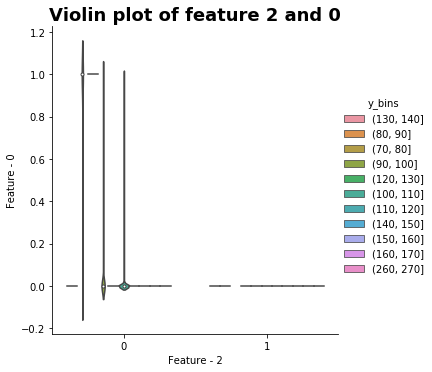

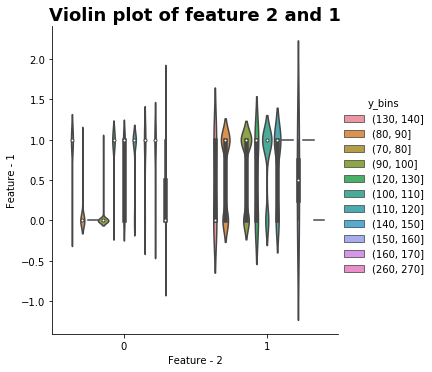

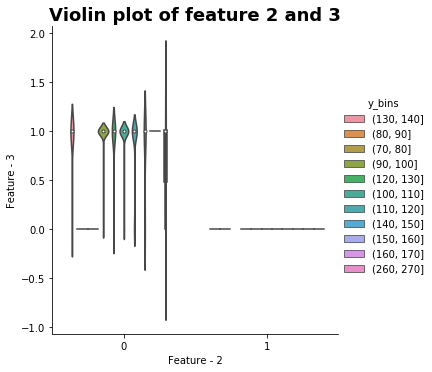

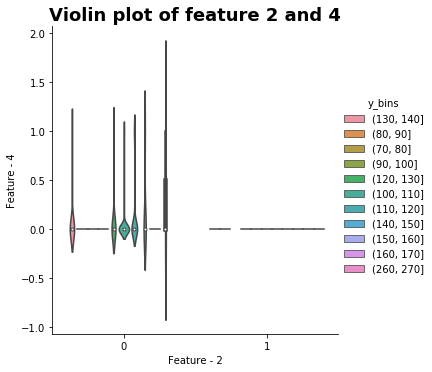

In [27]:
# Feature - 2
i = 2
# Looping through all the important features
for j in range (0,5):
    # Checking if the both i and j feature are the same 
    if (i!=j):
        # Plotting a violin plot of i and j feature
        sns.catplot(x= i,y=j, kind = 'violin', hue ='y_bins', data = imp_features)
        # Plotting the xlabel, ylabel and title
        plt.xlabel('Feature - '+str(i))
        plt.ylabel('Feature - '+str(j))
        plt.title('Violin plot of feature '+str(i)+' and '+str(j), fontweight = 'bold', fontsize = 18, y =1.04)
        plt.show()

The above plots represents the violin plots of feature-2 with all other important features
#### Violin plot of feature 2 and 0 
From the plot we can see that when both the features are 0 the target variable lies in the range of 90-110 and all other range of values are represented by a horizontal line which means that the number of occurances of when the target variable lies in other ranges which means that there are no common values for these target ranges (i.e) feature-2 is 0 and feature-0 is 1. And when the feature-2 is 1 we can see that there is a straight line which means that there are no values when both features are 1. 
#### Violin plot of feature 2 and 1 
From the plot we can see that when both the features are 0 the target variable lies in a range of 80-100 and for other features we can see that the other ranges of values are a straight line which means that the number of target variables which lie in other ranges mean that the density of features in those range when both the features are 0 is very low. When the feature-2 is 0 and feature-1 is 1 we can see that there are certain features with target variable is in the range of 100-130. When the feature-2 is 1 and feature-1 is 0 the target value lies in a range of 80-140 and the same range when both the features are 1.

#### Violin plot of feature 2 and 3
From the plot we can see that when both the features are 0 the target variable are represented by straight lines which means that the number of features with the target values in the range are very few. And when the feature-2 is 0 and feature-3 is 1 the target value is in the range of between 90-140. And when both the features are 1 there are no features that occur, and when the feature-2 is 1 and feature-3 is 0 there is a straight line which is beacuse there are no features where both features are 1. 

#### Violin plot of feature 2 and 4 
From the plot we can see that when both features are 0 the target variable lies in the range of 100-150 and when the feature-2 is 0 and feature-4 is 1 is a straight line which means that the density of occurance of those features is low. When the feature-2 is 1 and feature-4 is 0 it is showing a straight line and when both features are 1 there is no occurance when both features are 1. 

### Feature 3

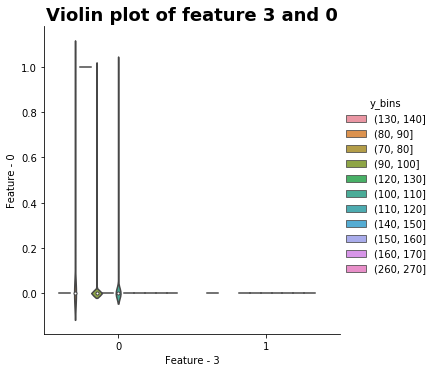

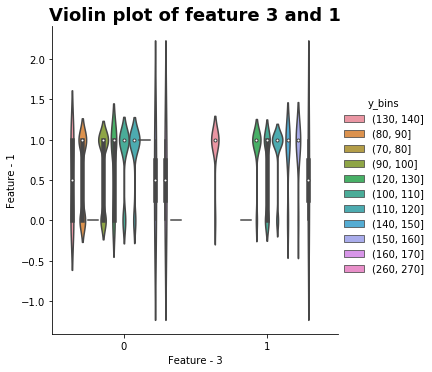

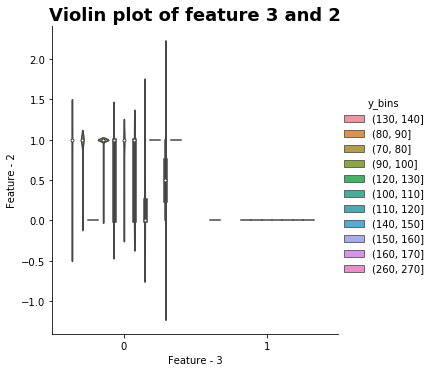

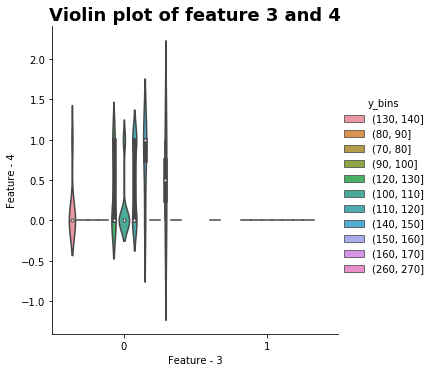

In [28]:
# Feature - 3
i = 3
# Looping through all the important features
for j in range (0,5):
    # Checking if the both i and j feature are the same 
    if (i!=j):
        # Plotting a violin plot of i and j feature
        sns.catplot(x= i,y=j, kind = 'violin', hue ='y_bins', data = imp_features)
        # Plotting the xlabel, ylabel and title
        plt.xlabel('Feature - '+str(i))
        plt.ylabel('Feature - '+str(j))
        plt.title('Violin plot of feature '+str(i)+' and '+str(j), fontweight = 'bold', fontsize = 18, y =1.04)
        plt.show()

Violin plot of feature-3 with all other features of important features
#### Violin plot of feature 3 and 0
From the plot we can see that when botht the features are 0 the target value is in range of 90-110 and for other range of target values there is a straight line which means that there are no values wherein the feature-3 is 0 and feature-0 is 1 and hence the violin plot is represented as a horizaontal line. And there is a horizontal line for range of 70-80 at feature-3 0 and feature-0 is 1 this means that for these values the target value lies in that range. For feature-3 1 and feature- 0 as 0 we can see that there are horizontal lines which means that there are no values with both features as 1.

#### Violin plot of feature 3 and 1
From the plot we can see that when both the features are 0 the target value lies in a range of 80-140 but the number of features are low as we can see from the shape of the plot. And when feature-3 is 0 and feature-1 is 1 the target value lies in a range of 80-140 and the number of values with these features are high as we can see from the plot. When the feature-3 is 1 and feature-1 is 0 the number of features are low and when botht the features are 1 the target value lies in a range of 100-160. 

#### Violin plot of feature 3 and 2
From the plot we can see that when feature-3 is 0 and when feature-2 is both 0 and 1 the plots are represented as a straight line which means that the features are distributed and hence the violin plots are represented as lines . For feature-3 as 1 and feature- 2 as 0 we can see that there are horizontal lines which means that there are no values with both features as 1.

#### Violin plot of feature 3 and 4 
From the plot we can see that when both features are 0 there are a lot of features with the target value which is in range of 100-150 and when feature-3 is 0 and feature-4 is 1 the target value is in range of 110-120 and 140-150 as seen from the density of the plot there are other values that lie in the range of target value but the density of the values that occur are very low as seen in the form of straight line. For feature-3 as 1 and feature- 4 as 0 we can see that there are horizontal lines which means that there are no values with both features as 1.

### Feature 4

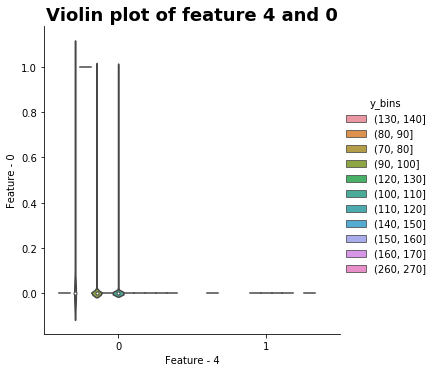

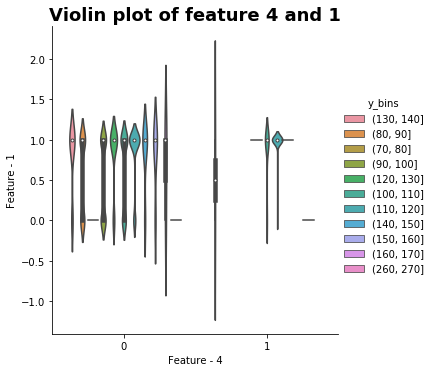

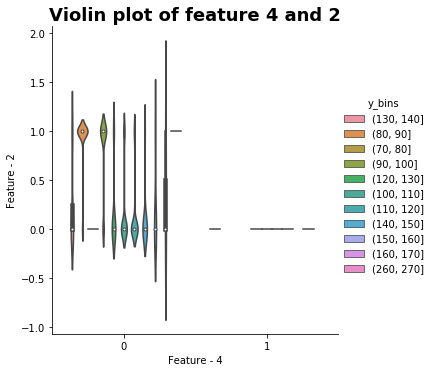

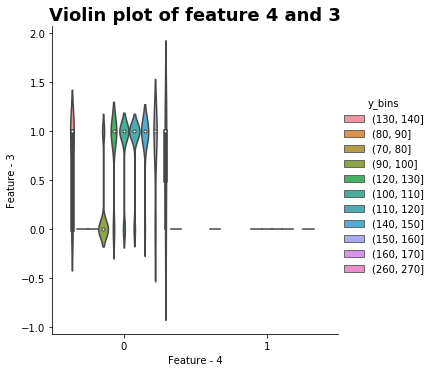

In [29]:
# Feature - 4
i = 4
# Looping through all the important features
for j in range (0,5):
    # Checking if the both i and j feature are the same 
    if (i!=j):
        # Plotting a violin plot of i and j feature
        sns.catplot(x= i,y=j, kind = 'violin', hue ='y_bins', data = imp_features)
        # Plotting the xlabel, ylabel and title
        plt.xlabel('Feature - '+str(i))
        plt.ylabel('Feature - '+str(j))
        plt.title('Violin plot of feature '+str(i)+' and '+str(j), fontweight = 'bold', fontsize = 18, y =1.04)
        plt.show()


Violin plot of feature-4 with all other features of important features
#### Violin plot of feature 4 and 0
From the plot we can see that when botht the features are 0 the target value is in range of 90-110 and for other range of target values there is a straight line which means that there are no values wherein the feature-4 is 0 and feature-0 is 1 and hence the violin plot is represented as a horizaontal line. And there is a horizontal line for range of 70-80 at feature-4 0 and feature-0 is 1 this means that for these values the target value lies in that range. For feature-4 1 and feature- 0 as 0 we can see that there are horizontal lines which means that there are no values with both features as 1.

#### Violin plot of feature 4 and 1
From the plot we can as see that when both the features are 0 the target value lies in a range of 80-100 and 140-150 but the number of occurance of feature are less hence the plot is small and when the feature-4 is 0 and feature-1 is 1 the target value lies in a range 80-160 and the number of values are high as the plots are large.  When feature-4 is 1 and feature-1 is 0 the number of features are very low and when both the features are 1 the target value lies in a range of 110-120 as seen from the plots. 

#### Violin plot of feature 4 and 2 
From the plot we can see that when both the feature value is 0 the target variable lies in the range of 100-150 as seen from the density plots of the range of target variable. When the feature-0 is 0 and feature-2 is 1 the target value lies in range of 80-100 as seen from the density of the violin plots. For feature-4 as 1 and feature- 2 as 0 we can see that there are horizontal lines which means that there are no values with both features as 1. This is also becaue the number of occurances of 1 in feature -4 is very less as seen from the countplot.

#### Violin plot of feature 4 and 3 
From the plot we can see that when botht the features are 0 the target variable lies in the range of 90-100 as the density of the plot is high as seen from violin plots. When the feature-4 is 0 and feature-3 is 1 the target value lies in a range of 90-160 as the density of the voilin plots. For feature-4 as 1 and feature- 3 as 0 we can see that there are horizontal lines which means that there are no values with both features as 1. This is also becaue the number of occurances of 1 in feature -4 is very less as seen from the countplot.

## 2. Feature Engineering

### 2.1 Removing columns that contain only 0 values from the train and test dataframe

In [30]:
total_columns_dropped = [] 

In [31]:
# Removing binary features which contain only 0 aso values in the train and test data frame
train_df = train_df.drop(columns_0, axis = 1)
test_df = test_df.drop(columns_0, axis = 1)
y_train = train_df['y']
train_df = train_df.drop(['y'],axis =1)
total_columns_dropped = total_columns_dropped + columns_0
train_df

ID  X0  X1  X2  X3  X4  X5  X6  X8  X10  ...  X375  X376  X377  X378  \
0        0  37  23  20   0   3  27   9  14    0  ...     0     0     1     0   
1        6  37  21  22   4   3  31  11  14    0  ...     1     0     0     0   
2        7  24  24  38   2   3  30   9  23    0  ...     0     0     0     0   
3        9  24  21  38   5   3  30  11   4    0  ...     0     0     0     0   
4       13  24  23  38   5   3  14   3  13    0  ...     0     0     0     0   
...    ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...   ...   ...   ...   ...   
4204  8405  10  20  19   2   3   1   3  16    0  ...     1     0     0     0   
4205  8406  36  16  44   3   3   1   7   7    0  ...     0     1     0     0   
4206  8412  10  23  42   0   3   1   6   4    0  ...     0     0     1     0   
4207  8415  11  19  29   5   3   1  11  20    0  ...     0     0     0     0   
4208  8417  52  19   5   2   3   1   6  22    0  ...     1     0     0     0   

      X379  X380  X382  X383  X384  X385  
0        0     0     0     0     0     0  
1        0     0     0     0     0     0  
2        0     0     1     0     0     0  
3        0     0     0     0     0     0  
4        0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...  
4204     0     0     0     0     0     0  
4205     0     0     0     0     0     0  
4206     0     0     0     0     0     0  
4207     0     0     0     0     0     0  
4208     0     0     0     0     0     0  

[4209 rows x 365 columns]

### 2.2 Feature transformation of target variable

In [32]:
# We are converting the target features into log of target features to reduce the skewness
y_train_log = np.log(y_train)

### 2.3 Creating new features by summing up binary features and keeping features which have high correlation with y

In [33]:
# Declaring a list to store the features
features = [] 
# Looping through all the bianry features
for i in columns_binary:
    # Looping through all the binary features
    for j in columns_binary:
        # Checking if both i and j are not the same column
        if (i != j):
            # Summing up i and j columns
            total = train_df[i]+train_df[j]
            # Checking if the correlation between summed up features and y are greater than 0.65
            if (y_train.corr(total)>0.65 or y_train.corr(total)<-0.65):
                features.append((i,j))

In [34]:
len(features)

22

In [35]:
features

[('X29', 'X127'),
 ('X54', 'X127'),
 ('X76', 'X127'),
 ('X127', 'X29'),
 ('X127', 'X54'),
 ('X127', 'X76'),
 ('X127', 'X162'),
 ('X127', 'X232'),
 ('X127', 'X276'),
 ('X127', 'X279'),
 ('X127', 'X328'),
 ('X136', 'X314'),
 ('X162', 'X127'),
 ('X232', 'X127'),
 ('X263', 'X314'),
 ('X276', 'X127'),
 ('X279', 'X127'),
 ('X314', 'X136'),
 ('X314', 'X263'),
 ('X314', 'X315'),
 ('X315', 'X314'),
 ('X328', 'X127')]

In [36]:
# From the above features selecting features such that they occur only once 
# The features were selected manually by going through the list
# Creating a data frame to store the summation features
summation_features_train = pd.DataFrame()
# Adding the summation features to the summation train dataframe
summation_features_train['ID'] = list(train_df['ID'])
summation_features_train['X29_plus_X127'] = list(train_df['X29']+train_df['X127'])
summation_features_train['X54_plus_X127'] = list(train_df['X54']+train_df['X127'])
summation_features_train['X76_plus_X127'] = list(train_df['X76']+train_df['X127'])
summation_features_train['X118_plus_X314'] = list(train_df['X118']+train_df['X314'])
summation_features_train['X119_plus_X314'] = list(train_df['X119']+train_df['X127'])
summation_features_train['X127_plus_X162'] = list(train_df['X127']+train_df['X162'])
summation_features_train['X127_plus_X166'] = list(train_df['X127']+train_df['X166'])
summation_features_train['X127_plus_X232'] = list(train_df['X127']+train_df['X232'])
summation_features_train['X127_plus_X272'] = list(train_df['X127']+train_df['X272'])
summation_features_train['X127_plus_X276'] = list(train_df['X127']+train_df['X276'])
summation_features_train['X127_plus_X279'] = list(train_df['X127']+train_df['X279'])
summation_features_train['X127_plus_X328'] = list(train_df['X127']+train_df['X328'])
summation_features_train['X136_plus_X261'] = list(train_df['X136']+train_df['X261'])
summation_features_train['X136_plus_X314'] = list(train_df['X136']+train_df['X314'])
summation_features_train['X221_plus_X314'] = list(train_df['X221']+train_df['X314'])
summation_features_train['X261_plus_X263'] = list(train_df['X261']+train_df['X263'])
summation_features_train['X261_plus_X315'] = list(train_df['X261']+train_df['X315'])
summation_features_train['X263_plus_X314'] = list(train_df['X263']+train_df['X314'])
summation_features_train['X314_plus_X315'] = list(train_df['X314']+train_df['X315'])

# Creating a summation test dataframe to store the summation feature
summation_features_test = pd.DataFrame()
# Adding the summation features to the summation test dataframe
summation_features_test['ID'] = list(test_df['ID'])
summation_features_test['X29_plus_X127'] = list(test_df['X29']+test_df['X127'])
summation_features_test['X54_plus_X127'] = list(test_df['X54']+test_df['X127'])
summation_features_test['X76_plus_X127'] = list(test_df['X76']+test_df['X127'])
summation_features_test['X118_plus_X314'] = list(test_df['X118']+test_df['X314'])
summation_features_test['X119_plus_X314'] = list(test_df['X119']+test_df['X127'])
summation_features_test['X127_plus_X162'] = list(test_df['X127']+test_df['X162'])
summation_features_test['X127_plus_X166'] = list(test_df['X127']+test_df['X166'])
summation_features_test['X127_plus_X232'] = list(test_df['X127']+test_df['X232'])
summation_features_test['X127_plus_X272'] = list(test_df['X127']+test_df['X272'])
summation_features_test['X127_plus_X276'] = list(test_df['X127']+test_df['X276'])
summation_features_test['X127_plus_X279'] = list(test_df['X127']+test_df['X279'])
summation_features_test['X127_plus_X328'] = list(test_df['X127']+test_df['X328'])
summation_features_test['X136_plus_X261'] = list(test_df['X136']+test_df['X261'])
summation_features_test['X136_plus_X314'] = list(test_df['X136']+test_df['X314'])
summation_features_test['X221_plus_X314'] = list(test_df['X221']+test_df['X314'])
summation_features_test['X261_plus_X263'] = list(test_df['X261']+test_df['X263'])
summation_features_test['X261_plus_X315'] = list(test_df['X261']+test_df['X315'])
summation_features_test['X263_plus_X314'] = list(test_df['X263']+test_df['X314'])
summation_features_test['X314_plus_X315'] = list(test_df['X314']+test_df['X315'])

In [37]:
summation_features_train

ID  X29_plus_X127  X54_plus_X127  X76_plus_X127  X118_plus_X314  \
0        0              0              0              0               1   
1        6              1              1              1               1   
2        7              1              1              1               0   
3        9              1              1              1               0   
4       13              1              1              1               0   
...    ...            ...            ...            ...             ...   
4204  8405              0              0              0               2   
4205  8406              0              0              0               2   
4206  8412              0              0              0               2   
4207  8415              1              1              1               0   
4208  8417              1              1              1               1   

      X119_plus_X314  X127_plus_X162  X127_plus_X166  X127_plus_X232  \
0                  1               0               0               0   
1                  2               1               1               1   
2                  0               1               0               1   
3                  0               1               1               1   
4                  0               1               1               1   
...              ...             ...             ...             ...   
4204               1               0               0               0   
4205               1               0               0               0   
4206               1               0               0               0   
4207               1               1               1               1   
4208               2               1               1               1   

      X127_plus_X272  X127_plus_X276  X127_plus_X279  X127_plus_X328  \
0                  0               0               0               0   
1                  1               1               1               1   
2                  1               1               1               1   
3                  1               1               1               1   
4                  1               1               1               1   
...              ...             ...             ...             ...   
4204               0               0               0               0   
4205               0               0               0               0   
4206               0               0               0               0   
4207               1               1               1               1   
4208               1               1               1               1   

      X136_plus_X261  X136_plus_X314  X221_plus_X314  X261_plus_X263  \
0                  1               1               0               1   
1                  1               1               0               1   
2                  0               0               0               0   
3                  0               0               0               0   
4                  0               0               0               0   
...              ...             ...             ...             ...   
4204               2               2               1               2   
4205               1               2               1               1   
4206               2               2               1               2   
4207               1               1               0               1   
4208               1               1               0               1   

      X261_plus_X315  X263_plus_X314  X314_plus_X315  
0                  0               1               0  
1                  0               1               0  
2                  0               0               0  
3                  0               0               0  
4                  0               0               0  
...              ...             ...             ...  
4204               1               2               1  
4205               0               2               1  
4206             

In [38]:
# Creating a list to store duplicate values in summation features
duplicates = [] 

# Looping through all the train summation features
for i in summation_features_train.columns:
    # Looping through all the train summation features
    for j in summation_features_train.columns:
        # Checking if i and j columns are not equal and all the values of i and j column are same which are duplicates
        if i !=j and (np.array_equal(summation_features_train[i],summation_features_train[j])):
            # Appending duplicate values to the list
            duplicates.append((i,j))
duplicates

[('X29_plus_X127', 'X127_plus_X232'),
 ('X29_plus_X127', 'X127_plus_X279'),
 ('X54_plus_X127', 'X76_plus_X127'),
 ('X76_plus_X127', 'X54_plus_X127'),
 ('X127_plus_X232', 'X29_plus_X127'),
 ('X127_plus_X232', 'X127_plus_X279'),
 ('X127_plus_X279', 'X29_plus_X127'),
 ('X127_plus_X279', 'X127_plus_X232')]

In [39]:
# Removing the duplicate columns by manually going through the duplicate list and determining columns so that they occur only once
summation_features_train = summation_features_train.drop(['X127_plus_X232','X127_plus_X279','X76_plus_X127'],axis = 1)
summation_features_test = summation_features_test.drop(['X127_plus_X232','X127_plus_X279','X76_plus_X127'],axis = 1)

### 2.4 Removing duplicate features 

In [40]:
# Creating a list to store duplicate values in summation features
duplicates = [] 

# Looping through all the train summation features
for i in train_df.columns:
    # Looping through all the train summation features
    for j in train_df.columns:
        #Checking if i and j columns are not equal and all the values of i and j column are same which are duplicates
        if i !=j and (np.array_equal(train_df[i],train_df[j])):
            # Appending duplicate values to the list
            duplicates.append((i,j))
            
print(duplicates)

[('X17', 'X382'), ('X29', 'X232'), ('X29', 'X279'), ('X31', 'X35'), ('X31', 'X37'), ('X33', 'X39'), ('X35', 'X31'), ('X35', 'X37'), ('X37', 'X31'), ('X37', 'X35'), ('X39', 'X33'), ('X44', 'X302'), ('X48', 'X113'), ('X48', 'X134'), ('X48', 'X147'), ('X48', 'X222'), ('X53', 'X102'), ('X53', 'X214'), ('X53', 'X239'), ('X54', 'X76'), ('X58', 'X324'), ('X60', 'X248'), ('X60', 'X253'), ('X60', 'X385'), ('X62', 'X172'), ('X62', 'X216'), ('X67', 'X213'), ('X71', 'X84'), ('X71', 'X244'), ('X76', 'X54'), ('X84', 'X71'), ('X84', 'X244'), ('X88', 'X122'), ('X88', 'X243'), ('X88', 'X320'), ('X89', 'X245'), ('X90', 'X94'), ('X90', 'X242'), ('X94', 'X90'), ('X94', 'X242'), ('X102', 'X53'), ('X102', 'X214'), ('X102', 'X239'), ('X112', 'X199'), ('X113', 'X48'), ('X113', 'X134'), ('X113', 'X147'), ('X113', 'X222'), ('X118', 'X119'), ('X119', 'X118'), ('X122', 'X88'), ('X122', 'X243'), ('X122', 'X320'), ('X125', 'X227'), ('X134', 'X48'), ('X134', 'X113'), ('X134', 'X147'), ('X134', 'X222'), ('X138', 'X14

In [41]:
# From the above duplicate list manually selecting columns so that they occur only once
unique_columns = ['X17','X29', 'X31', 'X33', 'X44', 'X48', 'X53', 'X54', 'X58', 'X60', 'X62', 'X67', 'X71', 'X88', 'X89', 'X90', 'X112', 'X118', 'X125', 'X138', 'X152', 'X155', 'X184', 'X202', 'X230', 'X240', 'X295', 'X298']
# Finding all the unique columns in the duplicate list
unique_duplicate_columns = np.unique(np.array([j for i in duplicates for j in i]))
# Subtracting the unqiue columns from all unique columns in duplicate list to determine the columns to be removed
columns_to_be_removed = list (set(unique_duplicate_columns) - set(unique_columns))
# Dropping the columns to be removed from train and test data frame
train_df = train_df.drop(columns_to_be_removed, axis = 1)
test_df = test_df.drop(columns_to_be_removed, axis = 1)
total_columns_dropped = total_columns_dropped + columns_to_be_removed
train_df

ID  X0  X1  X2  X3  X4  X5  X6  X8  X10  ...  X373  X374  X375  X376  \
0        0  37  23  20   0   3  27   9  14    0  ...     0     0     0     0   
1        6  37  21  22   4   3  31  11  14    0  ...     0     0     1     0   
2        7  24  24  38   2   3  30   9  23    0  ...     0     0     0     0   
3        9  24  21  38   5   3  30  11   4    0  ...     0     0     0     0   
4       13  24  23  38   5   3  14   3  13    0  ...     0     0     0     0   
...    ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...   ...   ...   ...   ...   
4204  8405  10  20  19   2   3   1   3  16    0  ...     0     0     1     0   
4205  8406  36  16  44   3   3   1   7   7    0  ...     0     0     0     1   
4206  8412  10  23  42   0   3   1   6   4    0  ...     0     0     0     0   
4207  8415  11  19  29   5   3   1  11  20    0  ...     0     1     0     0   
4208  8417  52  19   5   2   3   1   6  22    0  ...     0     0     1     0   

      X377  X378  X379  X380  X383  X384  
0        1     0     0     0     0     0  
1        0     0     0     0     0     0  
2        0     0     0     0     0     0  
3        0     0     0     0     0     0  
4        0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...  
4204     0     0     0     0     0     0  
4205     0     0     0     0     0     0  
4206     1     0     0     0     0     0  
4207     0     0     0     0     0     0  
4208     0     0     0     0     0     0  

[4209 rows x 320 columns]

### 2.5 Removing features with high correlation

In [42]:
corr_columns = [] 
# Looping through all the columns
for i in train_df.columns:
    # Looping through all the columns
    for j in train_df.columns:
        # Checking if both i and j are not the same features
        if (i!=j):
            # Finding the correlation of features
            corr = train_df[i].corr(train_df[j])
            # Checking if the correlation between columns is not more than 0.90 and adding them to the list
            if corr>0.90 or corr<-0.90:
                corr_columns.append((i,j))

In [43]:
corr_columns

[('X14', 'X251'),
 ('X19', 'X215'),
 ('X29', 'X54'),
 ('X29', 'X136'),
 ('X29', 'X162'),
 ('X29', 'X263'),
 ('X29', 'X272'),
 ('X29', 'X276'),
 ('X29', 'X328'),
 ('X48', 'X66'),
 ('X48', 'X111'),
 ('X48', 'X198'),
 ('X49', 'X129'),
 ('X52', 'X61'),
 ('X52', 'X120'),
 ('X53', 'X370'),
 ('X54', 'X29'),
 ('X54', 'X136'),
 ('X54', 'X162'),
 ('X54', 'X263'),
 ('X54', 'X272'),
 ('X54', 'X276'),
 ('X54', 'X328'),
 ('X58', 'X137'),
 ('X61', 'X52'),
 ('X61', 'X120'),
 ('X63', 'X379'),
 ('X66', 'X48'),
 ('X66', 'X111'),
 ('X80', 'X101'),
 ('X80', 'X179'),
 ('X80', 'X348'),
 ('X88', 'X90'),
 ('X88', 'X99'),
 ('X88', 'X217'),
 ('X88', 'X249'),
 ('X90', 'X88'),
 ('X90', 'X217'),
 ('X90', 'X249'),
 ('X96', 'X150'),
 ('X96', 'X363'),
 ('X98', 'X101'),
 ('X99', 'X88'),
 ('X101', 'X80'),
 ('X101', 'X98'),
 ('X108', 'X371'),
 ('X111', 'X48'),
 ('X111', 'X66'),
 ('X111', 'X198'),
 ('X118', 'X311'),
 ('X120', 'X52'),
 ('X120', 'X61'),
 ('X126', 'X264'),
 ('X128', 'X130'),
 ('X129', 'X49'),
 ('X130', 'X128

In [44]:
# Manually going through corr_columns and selecting columns so that they occur only once
columns = ['X14','X19','X29','X48','X52','X53','X58','X63','X80','X88','X96','X98','X108','X118','X126','X128','X129','X138','X142','X155','X156','X178','X185','X186','X189','X204','X208','X228','X246','X261','X331','X334','']
# Getting unique corr columns
corr_unique_columns = np.unique(np.array([j for i in corr_columns for j in i]))
# Removing the columns from unique columns
columns_to_be_removed = list (set(corr_unique_columns) - set(columns))
# Dropping the columns to be removed from train and test data frame
train_df = train_df.drop(columns_to_be_removed, axis = 1)
test_df = test_df.drop(columns_to_be_removed, axis = 1)
total_columns_dropped = total_columns_dropped + columns_to_be_removed
train_df

ID  X0  X1  X2  X3  X4  X5  X6  X8  X10  ...  X369  X372  X373  X374  \
0        0  37  23  20   0   3  27   9  14    0  ...     0     0     0     0   
1        6  37  21  22   4   3  31  11  14    0  ...     0     0     0     0   
2        7  24  24  38   2   3  30   9  23    0  ...     0     0     0     0   
3        9  24  21  38   5   3  30  11   4    0  ...     0     1     0     0   
4       13  24  23  38   5   3  14   3  13    0  ...     0     0     0     0   
...    ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...   ...   ...   ...   ...   
4204  8405  10  20  19   2   3   1   3  16    0  ...     0     0     0     0   
4205  8406  36  16  44   3   3   1   7   7    0  ...     0     0     0     0   
4206  8412  10  23  42   0   3   1   6   4    0  ...     0     0     0     0   
4207  8415  11  19  29   5   3   1  11  20    0  ...     0     0     0     1   
4208  8417  52  19   5   2   3   1   6  22    0  ...     0     0     0     0   

      X375  X376  X377  X380  X383  X384  
0        0     0     1     0     0     0  
1        1     0     0     0     0     0  
2        0     0     0     0     0     0  
3        0     0     0     0     0     0  
4        0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...  
4204     1     0     0     0     0     0  
4205     0     1     0     0     0     0  
4206     0     0     1     0     0     0  
4207     0     0     0     0     0     0  
4208     1     0     0     0     0     0  

[4209 rows x 269 columns]

In [57]:
pickle.dump(total_columns_dropped,open('total_columns_dropped.pkl','wb'))

In [58]:
summation_features_train

ID  X29_plus_X127  X54_plus_X127  X118_plus_X314  X119_plus_X314  \
0        0              0              0               1               1   
1        6              1              1               1               2   
2        7              1              1               0               0   
3        9              1              1               0               0   
4       13              1              1               0               0   
...    ...            ...            ...             ...             ...   
4204  8405              0              0               2               1   
4205  8406              0              0               2               1   
4206  8412              0              0               2               1   
4207  8415              1              1               0               1   
4208  8417              1              1               1               2   

      X127_plus_X162  X127_plus_X166  X127_plus_X272  X127_plus_X276  \
0                  0               0               0               0   
1                  1               1               1               1   
2                  1               0               1               1   
3                  1               1               1               1   
4                  1               1               1               1   
...              ...             ...             ...             ...   
4204               0               0               0               0   
4205               0               0               0               0   
4206               0               0               0               0   
4207               1               1               1               1   
4208               1               1               1               1   

      X127_plus_X328  X136_plus_X261  X136_plus_X314  X221_plus_X314  \
0                  0               1               1               0   
1                  1               1               1               0   
2                  1               0               0               0   
3                  1               0               0               0   
4                  1               0               0               0   
...              ...             ...             ...             ...   
4204               0               2               2               1   
4205               0               1               2               1   
4206               0               2               2               1   
4207               1               1               1               0   
4208               1               1               1               0   

      X261_plus_X263  X261_plus_X315  X263_plus_X314  X314_plus_X315  
0                  1               0               1               0  
1                  1               0               1               0  
2                  0               0               0               0  
3                  0               0               0               0  
4                  0               0               0               0  
...              ...             ...             ...             ...  
4204               2               1               2               1  
4205               1               0               2               1  
4206               2               1               2               1  
4207               1               0               1               0  
4208               1               0               1               0  

[4209 rows x 17 columns]

### 2.6 Creating new features by using dimensionality reduction techniques 

In [46]:
# To compute the number of components to be passed for TSVD and PCA we use the technique as in below paper
# Reference - https://arxiv.org/pdf/1305.5870.pdf
# Since the noise is not known we use the formulation given in the paper to compute tou (cutoff threshold)
# tou = w(beta)*sigma, where sigma = median of singular values 
# beta = number of rows in dataset/ number of columns in the dataset
# Computing the SVD
U, S, VT = np.linalg.svd(train_df, full_matrices = True)
# Computing the beta value based on the formula
beta = train_df.shape[0]/train_df.shape[1]
# Computing w(beta) based on the formula
x_beta = (0.56*(beta**3))- (0.95*(beta**2))+(1.82*beta)+1.43
# Computing the cutoff value
cutoff = x_beta*np.median(S)
print(cutoff)
count = 0 
# Finding the number of values that are above the cutoff and increasing the count
for i in S:
    if (i>cutoff):
        count = count+1
count

9591.90934368238


1

In [47]:
# tSVD
# Creating a TruncatedSVD object
tsvd = TruncatedSVD(n_components=count, random_state=10)
# Fitting and transforming the train data
tsvd_results_train = pd.DataFrame(tsvd.fit_transform(train_df))
# Transforming the test data 
tsvd_results_test = pd.DataFrame(tsvd.transform(test_df))
# Saving the Truncated SVD object to pickle file
pickle.dump(tsvd, open('tsvd.pkl','wb'))

In [48]:
# PCA
# Creating a PCA object
pca = PCA(n_components = count, random_state = 10)
# Fitting and transforming the train data
pca_results_train = pd.DataFrame(pca.fit_transform(train_df))
# Transforming the test data 
pca_results_test = pd.DataFrame(pca.transform(test_df))
# Saving the PCA object to pickle file 
pickle.dump(pca, open('pca.pkl','wb'))

In [49]:
# Number of components
n_comp = 12
# ICA
# Creating a FastICA object
ica = FastICA(n_components = n_comp, random_state = 10)
# Fitting and transforming the train data
ica_results_train = pd.DataFrame(ica.fit_transform(train_df))
# Transforming the test data 
ica_results_test = pd.DataFrame(ica.transform(test_df))
# Saving the ICA object to a pickle file
pickle.dump(ica,open('ica.pkl','wb'))

In [50]:
# Gaussian Random Projection (GRP)
# Creating a Gaussian Random Projection object
grp = GaussianRandomProjection(n_components = n_comp, random_state = 10)
# Fitting and transforming the train data
grp_results_train = pd.DataFrame(grp.fit_transform(train_df))
# Transforming the test data 
grp_results_test = pd.DataFrame(grp.transform(test_df))
# Saving the GRP object to pickle file
pickle.dump(grp, open('grp.pkl','wb'))

In [51]:
# Sparse Random Projection (SRP)
# Creating a Sparse Random Projection object
srp = SparseRandomProjection(n_components = n_comp, dense_output = True, random_state = 10)
# Fitting and transforming the train data
srp_results_train = pd.DataFrame(srp.fit_transform(train_df))
# Transforming the test data 
srp_results_test = pd.DataFrame(srp.transform(test_df))
pickle.dump(srp, open('srp.pkl','wb'))

In [52]:
# Non- Negative Matrix factorization 
# Creating a NMF object
nmf = NMF(n_components=n_comp, random_state = 10)
# Fitting and transforming the train data
nmf_results_train = pd.DataFrame(nmf.fit_transform(train_df))
# Transforming the test data 
nmf_results_test = pd.DataFrame(nmf.transform(test_df))
# Saving the SRP object to pickle file
pickle.dump(nmf, open('nmf.pkl','wb'))

In [53]:
# Feature Agglomeration 
# Creating a Feature Agglomeration object
fag = FeatureAgglomeration(n_clusters = n_comp)
# Fitting and transforming the train data
fag_results_train = pd.DataFrame(fag.fit_transform(train_df))
# Transforming the test data 
fag_results_test = pd.DataFrame(fag.transform(test_df))
# Saving the FeatureAgglomeration object to pickle file
pickle.dump(fag,open('fag.pkl','wb'))

In [54]:
# Looping from 0 to 11 as the number of components is 12
train_df['pca_'+str(0)] = list(pca_results_train.loc[:,0])
test_df['pca_'+str(0)] = list(pca_results_test.loc[:,0])
train_df['tsvd_'+str(0)] = list(tsvd_results_train.loc[:,0])
test_df['tsvd_'+str(0)] = list(tsvd_results_test.loc[:,0])
    
for i in range(n_comp):
    # Adding the PCA, ICA, TSVD, GRP, SRP, NMF, FAG features to train and test dataframes
    
    train_df['ica_'+str(i+1)] = list(ica_results_train.loc[:,i])
    test_df['ica_'+str(i+1)] = list(ica_results_test.loc[:,i])
    
    train_df['grp_'+str(i+1)] = list(grp_results_train.loc[:,i])
    test_df['grp_'+str(i+1)] = list(grp_results_test.loc[:,i])
    
    train_df['srp_'+str(i+1)] = list(srp_results_train.loc[:,i])
    test_df['srp_'+str(i+1)] = list(srp_results_test.loc[:,i])
    
    train_df['nmf_'+str(i+1)] = list(nmf_results_train.loc[:,i])
    test_df['nmf_'+str(i+1)] = list(nmf_results_test.loc[:,i])
    
    train_df['fag_'+str(i+1)] = list(fag_results_train.loc[:,i])
    test_df['fag_'+str(i+1)] = list(fag_results_test.loc[:,i])

In [55]:
train_df

ID  X0  X1  X2  X3  X4  X5  X6  X8  X10  ...    ica_11      grp_11  \
0        0  37  23  20   0   3  27   9  14    0  ...  0.002175  -11.963404   
1        6  37  21  22   4   3  31  11  14    0  ... -0.004447  -13.054353   
2        7  24  24  38   2   3  30   9  23    0  ... -0.013941  -17.728727   
3        9  24  21  38   5   3  30  11   4    0  ... -0.015714  -22.216544   
4       13  24  23  38   5   3  14   3  13    0  ... -0.016753  -22.205299   
...    ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...       ...         ...   
4204  8405  10  20  19   2   3   1   3  16    0  ...  0.019356 -772.909155   
4205  8406  36  16  44   3   3   1   7   7    0  ... -0.025400 -780.731068   
4206  8412  10  23  42   0   3   1   6   4    0  ... -0.013389 -785.289054   
4207  8415  11  19  29   5   3   1  11  20    0  ... -0.013876 -772.739544   
4208  8417  52  19   5   2   3   1   6  22    0  ...  0.007737 -768.014619   

        srp_11    nmf_11  fag_11    ica_12      grp_12    srp_12    nmf_12  \
0    -1.169089  0.053341     3.0 -0.006400   -1.852340  2.338177  0.048134   
1     1.169089  0.137875     3.0  0.013711   -3.400322  1.169089  0.000000   
2     0.000000  0.000000     3.0  0.012408   11.992147 -2.338177  0.000000   
3     0.000000  0.000000     3.0  0.021319    8.945960 -1.169089  0.000000   
4     0.000000  0.000000     3.0 -0.004597    7.947179 -1.169089  0.000000   
...        ...       ...     ...       ...         ...       ...       ...   
4204  1.169089  0.129527     3.0 -0.005016 -828.739117  0.000000  0.000000   
4205  0.000000  0.001569     3.0 -0.004328 -834.419009  0.000000  0.018493   
4206  3.507266  0.040884     3.0 -0.002428 -822.762588  3.507266  0.036489   
4207 -1.169089  0.000000     3.0 -0.006700 -830.012561 -1.169089  0.000000   
4208  0.000000  0.057397     3.0 -0.015783 -853.158372  1.169089  0.000000   

      fag_12  
0        0.0  
1        4.0  
2        2.0  
3        5.0  
4        5.0  
...      ...  
4204     2.0  
4205     3.0  
4206     0.0  
4207     5.0  
4208     2.0  

[4209 rows x 331 columns]

### 2.7 Adding the summation features to the train and test dataframes

In [75]:
# Combining the summation and train and test features data frames together
train_df = pd.merge(train_df, summation_features_train)
test_df = pd.merge(test_df, summation_features_test)

In [76]:
train_df

ID  X0  X1  X2  X3  X4  X5  X6  X8  X10  ...  X127_plus_X272  \
0        0  37  23  20   0   3  27   9  14    0  ...               0   
1        6  37  21  22   4   3  31  11  14    0  ...               1   
2        7  24  24  38   2   3  30   9  23    0  ...               1   
3        9  24  21  38   5   3  30  11   4    0  ...               1   
4       13  24  23  38   5   3  14   3  13    0  ...               1   
...    ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...             ...   
4204  8405  10  20  19   2   3   1   3  16    0  ...               0   
4205  8406  36  16  44   3   3   1   7   7    0  ...               0   
4206  8412  10  23  42   0   3   1   6   4    0  ...               0   
4207  8415  11  19  29   5   3   1  11  20    0  ...               1   
4208  8417  52  19   5   2   3   1   6  22    0  ...               1   

      X127_plus_X276  X127_plus_X328  X136_plus_X261  X136_plus_X314  \
0                  0               0               1               1   
1                  1               1               1               1   
2                  1               1               0               0   
3                  1               1               0               0   
4                  1               1               0               0   
...              ...             ...             ...             ...   
4204               0               0               2               2   
4205               0               0               1               2   
4206               0               0               2               2   
4207               1               1               1               1   
4208               1               1               1               1   

      X221_plus_X314  X261_plus_X263  X261_plus_X315  X263_plus_X314  \
0                  0               1               0               1   
1                  0               1               0               1   
2                  0               0               0               0   
3                  0               0               0               0   
4                  0               0               0               0   
...              ...             ...             ...             ...   
4204               1               2               1               2   
4205               1               1               0               2   
4206               1               2               1               2   
4207               0               1               0               1   
4208               0               1               0               1   

      X314_plus_X315  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
4204               1  
4205               1  
4206               1  
4207               0  
4208               0  

[4209 rows x 347 columns]

In [77]:
test_df

ID  X0  X1  X2  X3  X4  X5  X6  X8  X10  ...  X127_plus_X272  \
0        1  24  23  38   5   3  26   0  22    0  ...               1   
1        2  46   3   9   0   3   9   6  24    0  ...               1   
2        3  24  23  19   5   3   0   9   9    0  ...               0   
3        4  24  13  38   5   3  32  11  13    0  ...               1   
4        5  49  20  19   2   3  31   8  12    0  ...               0   
...    ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...             ...   
4204  8410   9   9  19   5   3   1   9   4    0  ...               0   
4205  8411  46   1   9   3   3   1   9  24    0  ...               1   
4206  8413  51  23  19   5   3   1   3  22    0  ...               1   
4207  8414  10  23  19   0   3   1   2  16    0  ...               0   
4208  8416  46   1   9   2   3   1   6  17    0  ...               1   

      X127_plus_X276  X127_plus_X328  X136_plus_X261  X136_plus_X314  \
0                  1               1               0               0   
1                  1               1               1               1   
2                  1               1               0               0   
3                  1               1               0               0   
4                  0               0               2               2   
...              ...             ...             ...             ...   
4204               0               0               2               2   
4205               1               1               1               1   
4206               1               1               1               1   
4207               0               0               2               2   
4208               1               1               1               1   

      X221_plus_X314  X261_plus_X263  X261_plus_X315  X263_plus_X314  \
0                  0               0               0               0   
1                  0               1               0               1   
2                  0               0               0               0   
3                  0               0               0               0   
4                  1               2               1               2   
...              ...             ...             ...             ...   
4204               1               2               1               2   
4205               0               1               0               1   
4206               0               1               0               1   
4207               1               2               1               2   
4208               0               1               0               1   

      X314_plus_X315  
0                  0  
1                  0  
2                  0  
3                  0  
4                  1  
...              ...  
4204               1  
4205               0  
4206               0  
4207               1  
4208               0  

[4209 rows x 347 columns]

In [56]:
# Saving the train and test data frames to a csv file
train_df.to_csv('Final_train_features.csv')
test_df.to_csv('Final_test_features.csv')

In [64]:
summation_features_train.columns


Index(['ID', 'X29_plus_X127', 'X54_plus_X127', 'X118_plus_X314',
       'X119_plus_X314', 'X127_plus_X162', 'X127_plus_X166', 'X127_plus_X272',
       'X127_plus_X276', 'X127_plus_X328', 'X136_plus_X261', 'X136_plus_X314',
       'X221_plus_X314', 'X261_plus_X263', 'X261_plus_X315', 'X263_plus_X314',
       'X314_plus_X315'],
      dtype='object')

### 2.8 Training ElasticNet model to find feature importance and removing features with 0 feature importance

In [65]:
# Let's perform a cross-validation to find the best combination of alpha and l1_ratio
# The values for cross validation is taken from https://www.kaggle.com/den3b81/elasticnet-lb-0-547-and-feature-importance
cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=3500, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')
# Fitting the train data 
cv_model.fit(train_df,y_train_log)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1], max_iter=3500,
             n_alphas=100, n_jobs=-1, normalize=True, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [66]:
# Training model with best parameters from CV
model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
model.fit(train_df, y_train_log)

# Predicting the train data and printing the r2 score
pred = model.predict(train_df)
pred = np.round(np.exp(pred),2)
print('Train r2 score:',r2_score(y_train, pred))

Train r2 score: 0.5687749167821097


Number of important features: 38 
Percentage feature reduction: 88.52%


Text(0, 0.5, 'Feature Importance value')

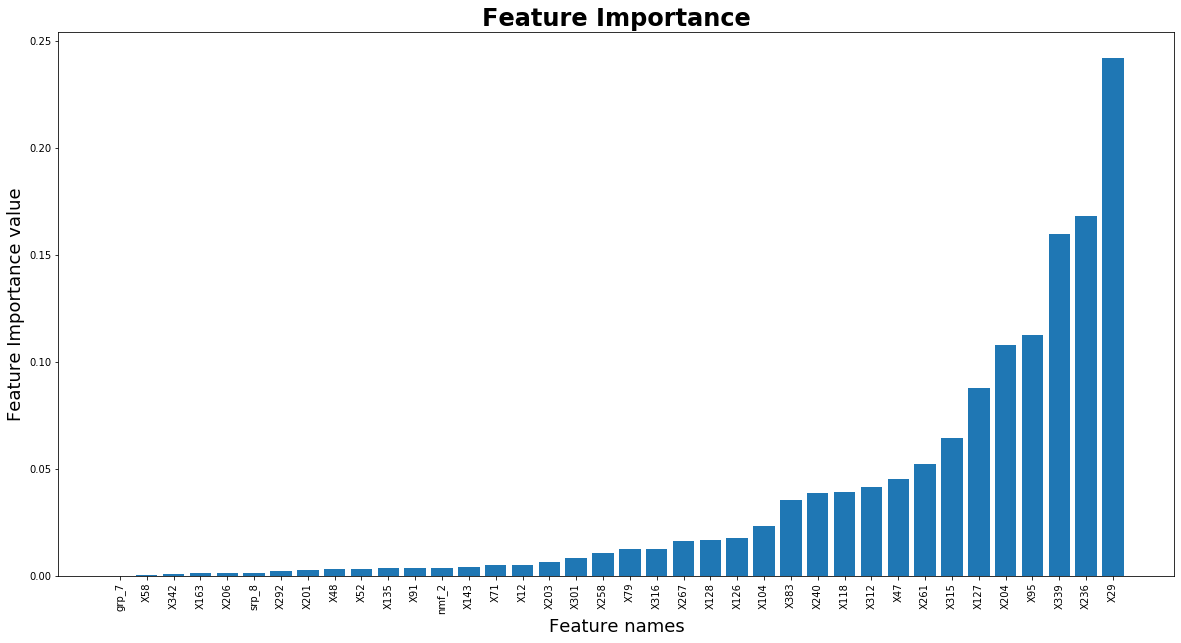

In [67]:
# Storing the abs values of feature importances from the model
feature_importance = np.abs(model.coef_)
# Creating a list of all the columns
columns = train_df.columns
# Creating a empty dictionary to store the features with feature importance greater than 0
important_features = {}
# Looping through all the features
for i in range(0,len(feature_importance)):
    # Checking if the feature importance value is greater than 0
    if (feature_importance[i]>0):
        # Adding the feature to the dictionary
        important_features[columns[i]] = feature_importance[i]

# Printing the number of features with feature importance greater than 0 and the percentage resuction in features
print('Number of important features: {0:} \nPercentage feature reduction: {1:2.2f}%'
      .format(len(important_features),(100-(len(important_features)/len(train_df.columns))*100)))
# Sorting the dictionary based on values
sorted_d = dict(sorted(important_features.items(), key=operator.itemgetter(1)))

# Plotting the bar plot of features and feature importances
plt.figure(figsize = (20,10))
plt.bar(sorted_d.keys(), sorted_d.values())
plt.xticks(rotation = 90)
# Plotting xlabel, ylabel and title of the plot
plt.title('Feature Importance',fontweight = 'bold', fontsize = 24)
plt.xlabel('Feature names', fontsize = 18)
plt.ylabel('Feature Importance value', fontsize = 18)

This plot represents the feature importance of the features. 
1. As we can see from the plot 'X236' has the highest feature importance. 
2. These are all the features which have a feature importance of greater than 0.
3. The features are sorted in the incresing order of feature importances. 

### 2.9 Feature Importance using permutation importance

In [68]:
# Passing the Elastic net model to the permutation importance 
perm = PermutationImportance(model, random_state=1).fit(train_df,y_train_log)
eli5.show_weights(perm,top =50, feature_names = train_df.columns.tolist())

In [69]:
# Creating a array of important features from permutation importance
important_features_pi = ['X29','X29_plus_X127','X118_plus_X314','X314_plus_X315','X315','X48','X47','grp_7','X316',
                        'X236','X339','X240','X301','X79','X71','X267','X204','X95','X383','X201','X135','X12',
                        'X104','nmf_2','X203','srp_8','X143','X306','X163','X52','X58','X312','ica_1','X292','X206']
# Finding common features between elasticNet model and permutation importance and printing them
common_imp_features = set(sorted_d.keys()).intersection(set(important_features_pi))
print(common_imp_features)
print("Number of common important features are ", len(common_imp_features))

{'X204', 'X79', 'X95', 'X316', 'X312', 'X315', 'X236', 'X52', 'X29', 'X104', 'X47', 'X203', 'grp_7', 'X339', 'X71', 'X267', 'X163', 'nmf_2', 'X206', 'X240', 'X58', 'X301', 'X48', 'srp_8', 'X135', 'X383', 'X12', 'X143', 'X201', 'X292'}
Number of common important features are  30


From this we can see that all the features which have non-zero feature importance in elastic net model are present in the important features from permutation importance model with the exception of 3 features

## 3. Machine Learning Models

## 3.1 Extracting important columns from the dataset

In [70]:
# Creating a new train and test dataframe with important features
train_df_imp = train_df[common_imp_features]
test_df_imp = test_df[common_imp_features]
train_df_imp

X204  X79  X95  X316  X312  X315  X236  X52  X29  X104  ...  X58  X301  \
0        1    0    0     1     0     0     0    0    0     0  ...    1     0   
1        0    0    0     1     0     0     0    0    0     0  ...    0     0   
2        0    0    0     0     0     0     0    0    1     0  ...    1     0   
3        0    0    0     0     0     0     0    0    1     0  ...    0     0   
4        0    0    0     0     0     0     0    0    1     0  ...    0     0   
...    ...  ...  ...   ...   ...   ...   ...  ...  ...   ...  ...  ...   ...   
4204     0    0    0     0     0     0     0    0    0     0  ...    1     0   
4205     0    0    0     0     0     0     0    0    0     0  ...    0     0   
4206     0    0    0     0     0     0     0    0    0     0  ...    0     0   
4207     0    0    0     0     0     0     0    0    0     0  ...    0     1   
4208     0    0    0     0     0     0     0    0    0     0  ...    1     0   

      X48     srp_8  X135  X383  X12  X143  X201  X292  
0       0 -1.169089     0     0    0     0     0     0  
1       0  0.000000     0     0    0     0     0     0  
2       0  0.000000     0     0    0     0     0     0  
3       0  0.000000     0     0    0     0     0     0  
4       0  0.000000     0     0    0     0     0     0  
...   ...       ...   ...   ...  ...   ...   ...   ...  
4204    0 -1.169089     0     0    0     0     0     0  
4205    0 -2.338177     0     0    0     0     1     0  
4206    0  0.000000     0     0    1     0     0     0  
4207    0  1.169089     0     0    0     1     0     0  
4208    0 -1.169089     0     0    0     0     0     0  

[4209 rows x 30 columns]

## Linear Models

## 3.2 Linear Regression

### 3.2.1 Linear Regression on Important features

In [66]:
# Creating a model object and fitting the linearRegression model on important features
clf_linear_imp = LinearRegression()
clf_linear_imp.fit(train_df_imp, y_train_log)

# Predicting and printing the train r2 score 
pred = clf_linear_imp.predict(train_df_imp)
pred = np.round(np.exp(pred),2)
print('Train r2 score:',r2_score(y_train, pred))

Train r2 score: 0.5787160472008716


In [67]:
# Creating a dataframe to store the results
result_linear_imp = pd.DataFrame()
# Predicting the test results
pred_test = np.round(np.exp(clf_linear_imp.predict(test_df_imp)),2)
result_linear_imp['ID'] = test_df['ID']
result_linear_imp['y'] = list(pred_test)
# Saving the results in a csv file
result_linear_imp.to_csv('result_linear_imp.csv',index=False)

Uploading the csv file to kaggle competition get we get r2 score of 0.52965

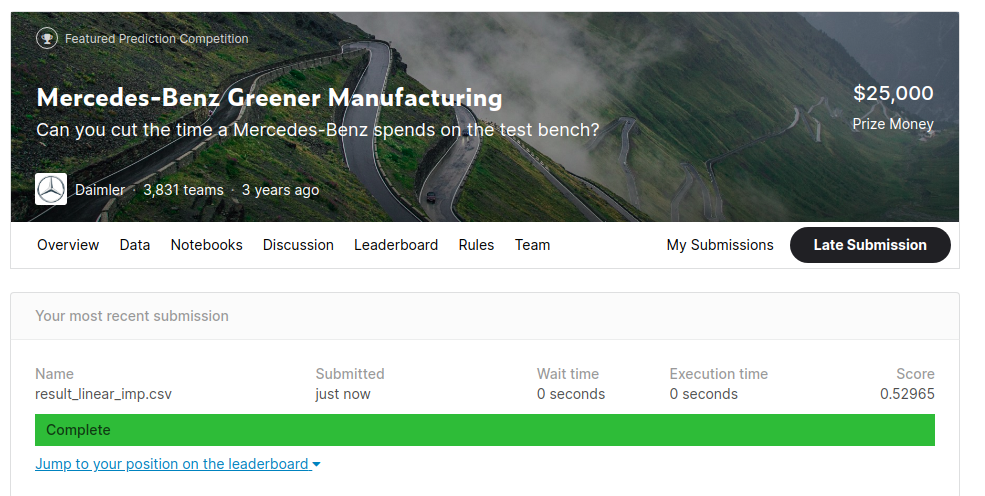

### 3.2.2 Linear Regression on all features

In [79]:
# Creating a model object and fitting the linearRegression model on all features
clf_linear = LinearRegression()
clf_linear.fit(train_df, y_train_log)

# Predicting and printing the train r2 score
pred = clf_linear.predict(train_df)
pred = np.round(np.exp(pred),2)
print('Train r2 score:',r2_score(y_train, pred))

Train r2 score: 0.5947154146428608


In [80]:
# Creating a dataframe to store the results
result_linear = pd.DataFrame()
# Predicting the results for test data 
pred_test = np.round(np.exp(clf_linear.predict(test_df)),2)
result_linear['ID'] = test_df['ID']
result_linear['y'] = list(pred_test)
# Saving the results into a csv file 
result_linear.to_csv('result_linear.csv',index=False)

Uploading the csv file to kaggle we get the test r2 score which is very high which means that the model is not very good

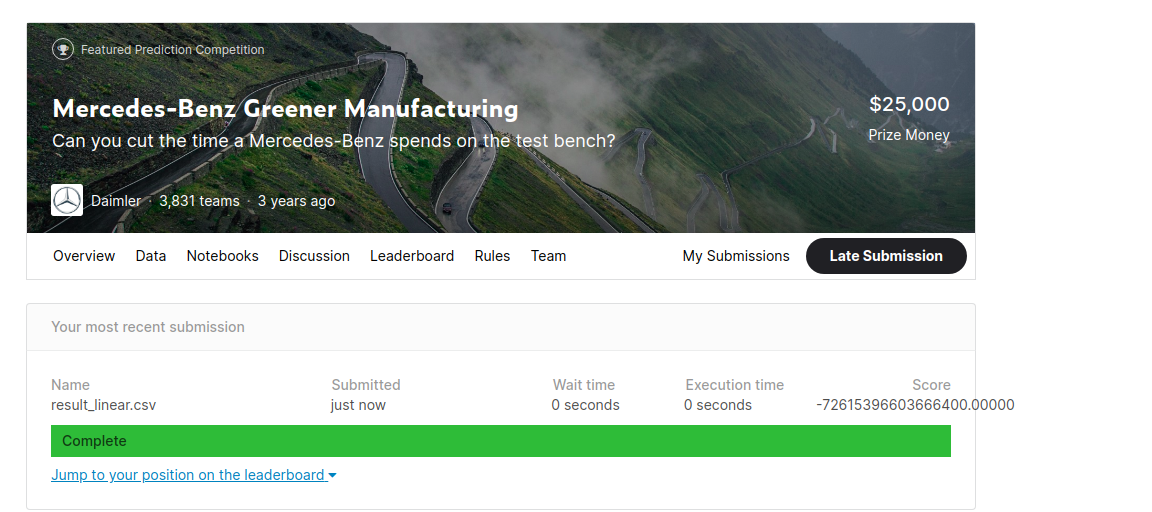

## 3.3 ElasticNet Model

### 3.3.1 ElasticNet Model on Important features

In [69]:
# Creating a model object
clf = ElasticNet()

# Defining th3e parameters
params = {
    'alpha':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
    'l1_ratio': np.arange(0, 1, 0.01)
}

# Fitting RandomizedSearchCV to find the best hyperparameter value
random_clf=RandomizedSearchCV(clf,param_distributions=params,verbose=10,n_jobs=-1,cv = 5,n_iter =10)
random_clf.fit(train_df_imp, y_train_log)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0237s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1736s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.9s finished
/home/pritesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0780941657942762, tolerance: 0.006228658582781248
  positive)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ElasticNet(alpha=1.0, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.5,
                                        max_iter=1000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'alpha': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1, 0.0, 1.0, 10.0...
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9

In [70]:
random_clf.best_params_

{'l1_ratio': 0.21, 'alpha': 0.0001}

In [73]:
# Fitting the model on the best hyperparameter values obtained from random search cv for important features
clf_en_imp = ElasticNet(alpha = 0.0001, l1_ratio = 0.65)
clf_en_imp.fit(train_df_imp, y_train_log)

# Predicting the and printing the train r2 score
pred = clf_en_imp.predict(train_df_imp)
pred = np.round(np.exp(pred),2)
print('Train r2 score:',r2_score(y_train, pred))


Train r2 score: 0.5729853030558374


In [74]:
# Creating a dataframe to store the results
result_en_imp = pd.DataFrame()
# Predicting the results for test data 
pred_test = np.round(np.exp(clf_en_imp.predict(test_df_imp)),2)
result_en_imp['ID'] = test_df['ID']
result_en_imp['y'] = list(pred_test)
# Saving the predicted results into a csv file 
result_en_imp.to_csv('result_en_imp.csv',index=False)

Uploading the predicted values csv file to kaggle competition page the r2 score for test data is 0.54031 

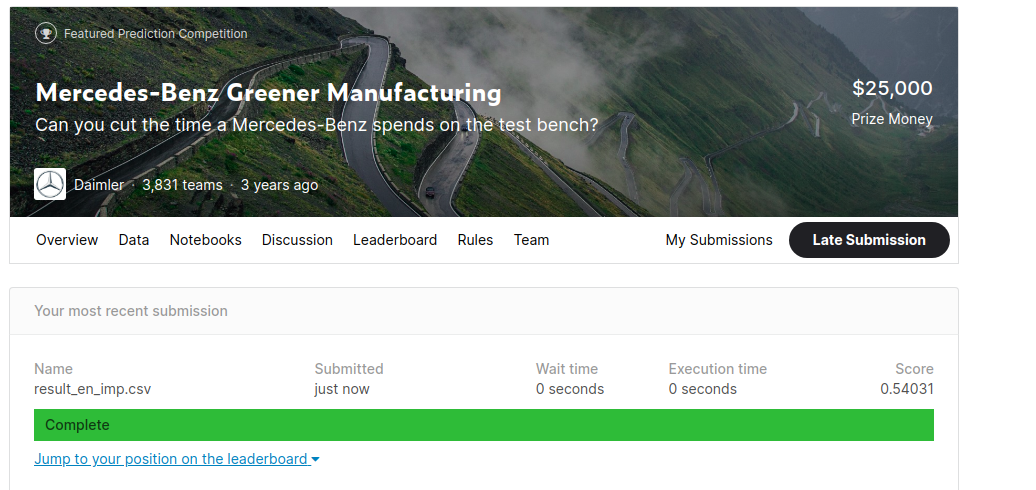

### 3.3.2 ElasticNet on all Features

In [82]:
# Creating a ElasticNet Object
clf = ElasticNet()

# Hyperparameters
params = {
    'alpha':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
    'l1_ratio': np.arange(0, 1, 0.01)
}

# Fitting a RandomizedSearchCv model to find the best hyperparameter values
random_clf=RandomizedSearchCV(clf,param_distributions=params,verbose=10,n_jobs=-1,cv = 5,n_iter =10)
random_clf.fit(train_df, y_train_log)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:   21.5s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:   25.7s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   25.9s finished
/home/pritesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.799522222778782, tolerance: 0.006228658582781248
  positive)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ElasticNet(alpha=1.0, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.5,
                                        max_iter=1000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'alpha': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1, 0.0, 1.0, 10.0...
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9

In [83]:
random_clf.best_params_

{'l1_ratio': 0.93, 'alpha': 0.0001}

In [85]:
# Creating a ElasticNet model from the best hyperparameter values obtained from random search cv for all features
clf_en = ElasticNet(alpha = 0.0001, l1_ratio = 0.93)
clf_en.fit(train_df, y_train_log)

# Predicting and printing the train r2 score
pred = clf_en.predict(train_df)
pred = np.round(np.exp(pred),2)
print('Train r2 score:',r2_score(y_train, pred))


Train r2 score: 0.5771581539814662


/home/pritesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.799522222778782, tolerance: 0.006228658582781248
  positive)


In [86]:
# Creating a dataframe to store the predicted values of test data
result_en = pd.DataFrame()
# Predicting for test data
pred_test = np.round(np.exp(clf_en.predict(test_df)),2)
result_en['ID'] = test_df['ID']
result_en['y'] = list(pred_test)
# Saving the results in a csv file
result_en.to_csv('result_en.csv',index=False)

Uploading the csv file to kaggle competition page and the r2 score for test data is 0.53665 which is lower than for important features 

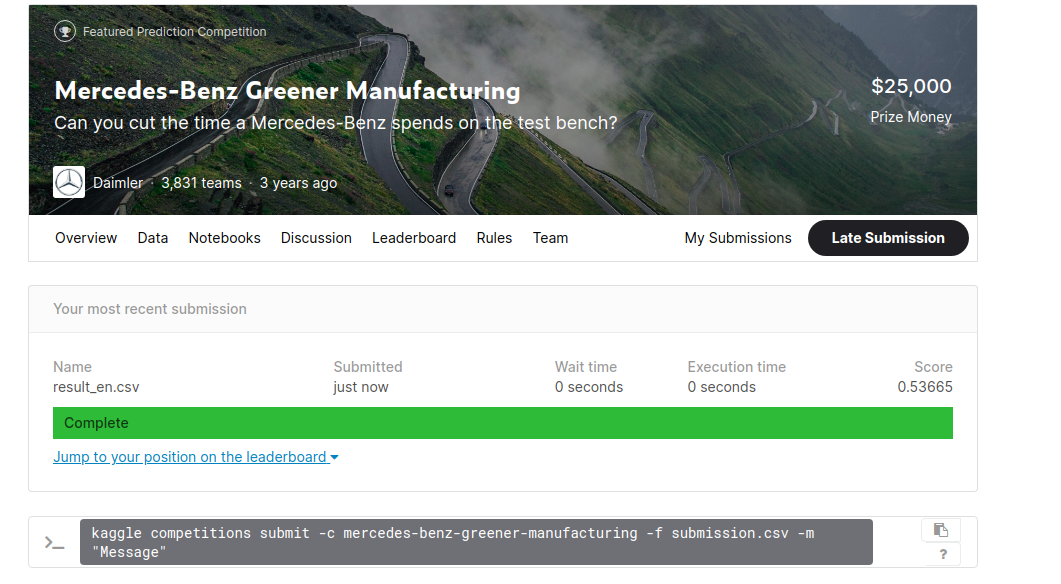

## Tree Based Models

## 3.4 Random Forest Classifier

### 3.4.1 Random Forest Classifier on important features

In [74]:
# Creating a Random Forest Regressor object 
clf = RandomForestRegressor()

# Hyperparameters
params = {
    'n_estimators':[100,200,500,1000,2000],
    'max_depth':[3,5,10],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1,2,4],
    'bootstrap':[True, False]
}

# Fitting a RandomizedSearchCV to find the best hyperparameters for our model
random_clf=RandomizedSearchCV(clf,param_distributions=params,verbose=10,n_jobs=-1,cv = 5)
random_clf.fit(train_df_imp, y_train_log)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  1.1min remaining:   14.8s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:  1.4min remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [75]:
random_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_depth': 3,
 'bootstrap': True}

In [85]:
# Creating a model with the best hyperparameters obtained from random search cv on important features
clf_rf_imp = RandomForestRegressor(n_estimators = 1000, min_samples_split = 5, min_samples_leaf =1, 
                           max_depth = 3, bootstrap = True)
clf_rf_imp.fit(train_df_imp, y_train_log)

# predicting and printing the train r2 score 
pred = clf_rf_imp.predict(train_df_imp)
pred = np.round(np.exp(pred),2)
print('Train r2 score:',r2_score(y_train, pred))

Train r2 score: 0.574592721607512


In [91]:
# Creating a dataframe
result_rf_imp = pd.DataFrame()
# Predicting the values for our test data
pred_test = np.round(np.exp(clf_rf_imp.predict(test_df_imp)),2)
result_rf_imp['ID'] = test_df['ID']
result_rf_imp['y'] = list(pred_test)
# Saving the results in a csv file
result_rf_imp.to_csv('result_rf_imp.csv',index=False)

RandomForest on important features gave us the highest r2 score of all the models until now on test data

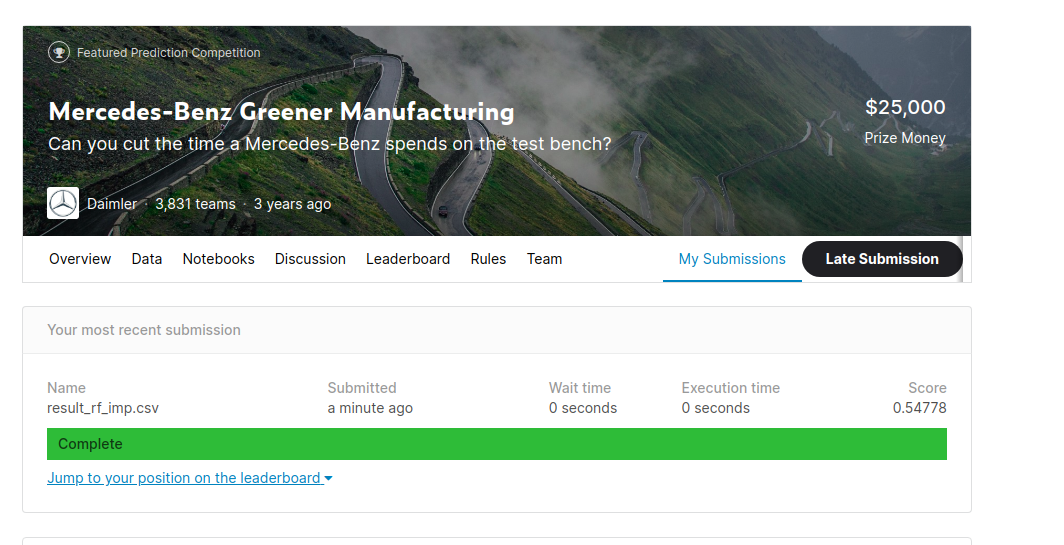

### 3.4.2 Random Forest classifier on all features

In [79]:
# Creating a random forest regressor object
clf = RandomForestRegressor()

# Hyperparameters
params = {
    'n_estimators':[100,200,500,1000,2000],
    'max_depth':[3,5,10],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1,2,4],
    'bootstrap':[True, False]
}

# Fitting a RandomizedSearchCV on all hyprparameters to find the best hyperparameter values
random_clf=RandomizedSearchCV(clf,param_distributions=params,verbose=10,n_jobs=-1,cv = 5)
random_clf.fit(train_df, y_train_log)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 14.0min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 14.9min remaining:   57.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 15.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [80]:
random_clf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': 3,
 'bootstrap': False}

In [96]:
# Creating a Random forest model on the best hyperparameter values obtained and fitting them on all features
clf_rf = RandomForestRegressor(n_estimators = 1000, min_samples_split = 2, min_samples_leaf =4, 
                           max_depth = 3, bootstrap = False)
clf_rf.fit(train_df, y_train_log)

# Predicting an printing the train r2 score 
pred = clf_rf.predict(train_df)
pred = np.round(np.exp(pred),2)
print('Train r2 score:',r2_score(y_train, pred))

Train r2 score: 0.5710037579148999


In [98]:
# Creating a dataframe
result_rf_imp = pd.DataFrame()
# Predicting the values on test data
pred_test = np.round(np.exp(clf_rf.predict(test_df)),2)
result_rf_imp['ID'] = test_df['ID']
result_rf_imp['y'] = list(pred_test)
# Saving the dataframe into a csv file
result_rf_imp.to_csv('result_rf.csv',index=False)

Uploading the csv file in kaggle we got a r2 score of 0.53743 which is less than the random forest on important features

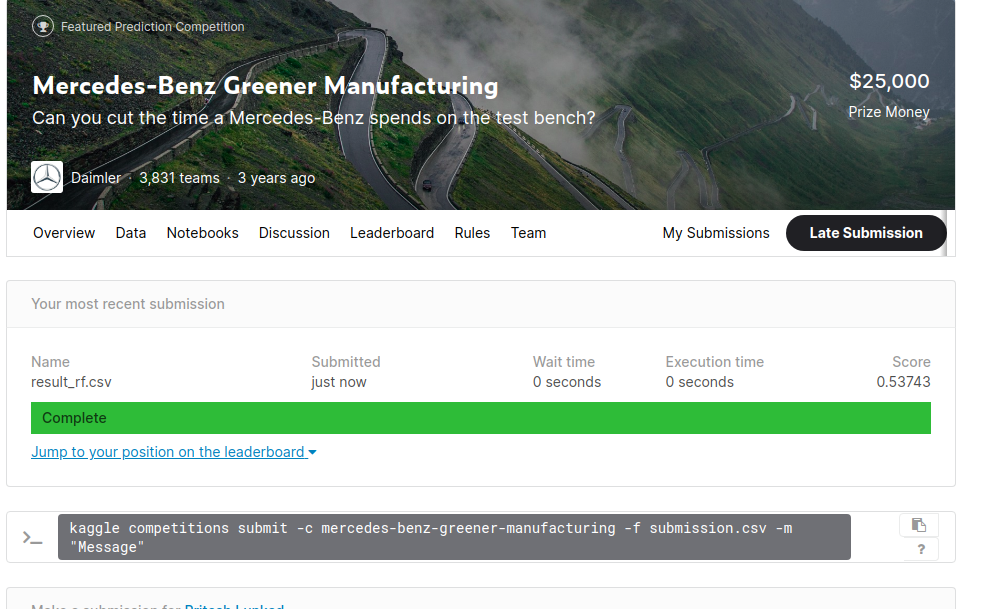

## 3.5 XGBOOST Regressor

### 3.5.1 XGBOOST on important features

In [110]:
# Creating a XGBRegressor object 
clf = XGBRegressor()

# Hyperparameters 
params={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}

# Fitting a RandomizedSearchCV on the hyperaprameters to find the best hyperparameters for the model
random_clf=RandomizedSearchCV(clf,param_distributions=params,verbose=10,n_jobs=-1,cv = 10)
random_clf.fit(train_df_imp, y_train_log)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed:   58.1s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n...
                                          validate_parameters=None,
                                          verbosity=None),
                   iid='deprecated', n_iter=10, n_jobs=-1,
    

In [111]:
random_clf.best_params_

{'subsample': 1,
 'n_estimators': 1000,
 'max_depth': 3,
 'learning_rate': 0.01,
 'colsample_bytree': 0.3}

In [63]:
# Creating a model object on the best hyperparameters got from random seach and fitting them on important features
clf_xgb_imp = XGBRegressor(subsample = 1, n_estimators = 1000, max_depth = 3, learning_rate = 0.01, colsample_bytree = 0.3)
clf_xgb_imp.fit(train_df_imp, y_train_log)

# Predicting and printint the r2 score for train data 
pred = clf_xgb_imp.predict(train_df_imp)
pred = np.round(np.exp(pred),2)
print('Train r2 score:',r2_score(y_train, pred))

Train r2 score: 0.6017388342158603


In [122]:
# Creating a dataframe
result_xgb_imp = pd.DataFrame()
# Predicting the result for the test data
pred_test = np.round(np.exp(clf_xgb_imp.predict(test_df_imp)),2)
result_xgb_imp['ID'] = test_df['ID']
result_xgb_imp['y'] = list(pred_test)\
# Saving the predicted values to a csv file 
result_xgb_imp.to_csv('result_xgb_imp.csv',index=False)

Uploading the csv file to kaggle we can see that xgboost is giving the best result till not with r2 score of 0.55069 on the test data

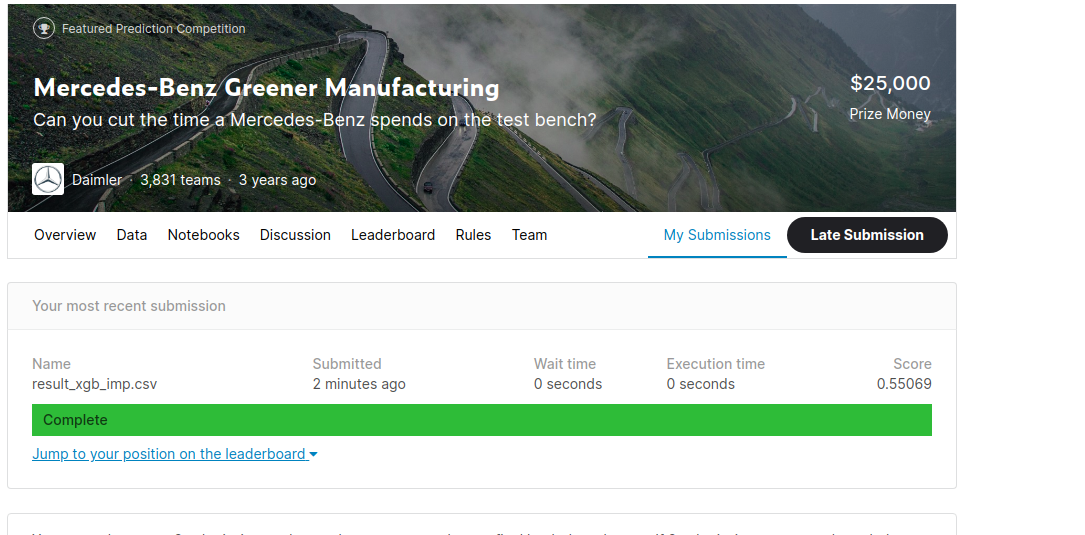

### 3.5.2 XGBOOST on all features

In [144]:
# Creating a XGBRegressor object
clf = XGBRegressor()

# Hyperparameters
params={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}

# Fitting RandomizedSearchCV to find the best hyperparameter values
random_clf=RandomizedSearchCV(clf,param_distributions=params,verbose=10,n_jobs=-1,cv = 10)
random_clf.fit(train_df, y_train_log)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed:  2.5min remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.7min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n...
                                          validate_parameters=None,
                                          verbosity=None),
                   iid='deprecated', n_iter=10, n_jobs=-1,
    

In [145]:
random_clf.best_params_

{'subsample': 1,
 'n_estimators': 500,
 'max_depth': 3,
 'learning_rate': 0.01,
 'colsample_bytree': 1}

In [149]:
# Creating a XGBRegressor object and fitting the model on the best hyperparameters obtained from random search on all features
clf_xgb= XGBRegressor(subsample = 1, n_estimators = 1000, max_depth = 3, learning_rate = 0.01, colsample_bytree = 0.3)
clf_xgb.fit(train_df, y_train_log)

# Predicting and printing the r2 score of train features
pred = clf_xgb.predict(train_df)
pred = np.round(np.exp(pred),2)
print('Train r2 score:',r2_score(y_train, pred))

Train r2 score: 0.6172560134283775


In [150]:
# Creating a dataframe
result_xgb = pd.DataFrame()
# Predicting the results for the test data 
pred_test = np.round(np.exp(clf_xgb.predict(test_df)),2)
result_xgb['ID'] = test_df['ID']
result_xgb['y'] = list(pred_test)
# Saving the dataframe into a scv file 
result_xgb.to_csv('result_xgb.csv',index=False)

Uploading the csv file to kaggle we can see that this model has given the best r2 score until not among all other models on test data of 0.55526

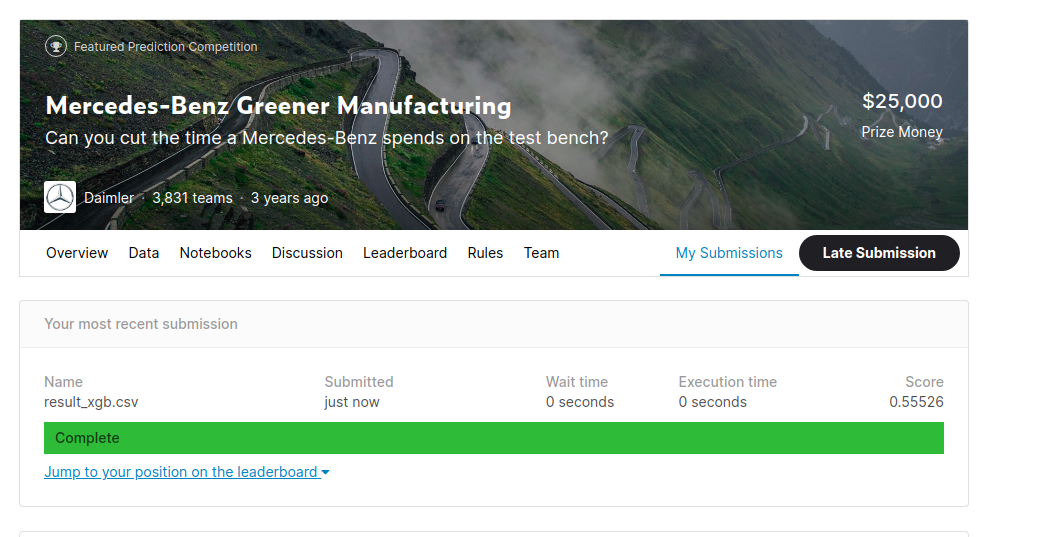

## 3.6 GradientBoostingRegressor

### 3.6.1 GradientBoostingRegressor on Important features

In [103]:
# Creating a GradientBoostingRegressor object
clf = GradientBoostingRegressor()

# Hyperparameters
params={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'subsample':[0.1,0.3,0.5,1]
}

# Fitting RandomizedSearchCV to find the best hyperparameter value
random_clf=RandomizedSearchCV(clf,param_distributions=params,verbose=10,n_jobs=-1,cv = 5)
random_clf.fit(train_df_imp, y_train_log)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:   43.7s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:   48.4s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   49.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [104]:
random_clf.best_params_

{'subsample': 1, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.03}

In [105]:
# Fitting GradientBoostingregressor on the best hyperparameter values and fitting on important features
clf_gbr_imp = GradientBoostingRegressor(subsample= 1,n_estimators = 200, max_depth = 3, learning_rate = 0.03)
clf_gbr_imp.fit(train_df_imp, y_train_log)

# Predicting and printing the r2 score of train data 
pred = clf_gbr_imp.predict(train_df_imp)
pred = np.round(np.exp(pred),2)
print('Train r2 score:',r2_score(y_train, pred))

Train r2 score: 0.6100778736172354


In [106]:
# Creating a dataframe 
result_gbr_imp = pd.DataFrame()
# Predicting the values for test data 
pred_test = np.round(np.exp(clf_gbr_imp.predict(test_df_imp)),2)
result_gbr_imp['ID'] = test_df['ID']
result_gbr_imp['y'] = list(pred_test)
# Saving the dataframe into a csv file
result_gbr_imp.to_csv('result_gbr_imp.csv',index=False)

Uploading the result csv file to kaggle and the r2 score for test data for GradientBoostingRegressor model is 0.54846

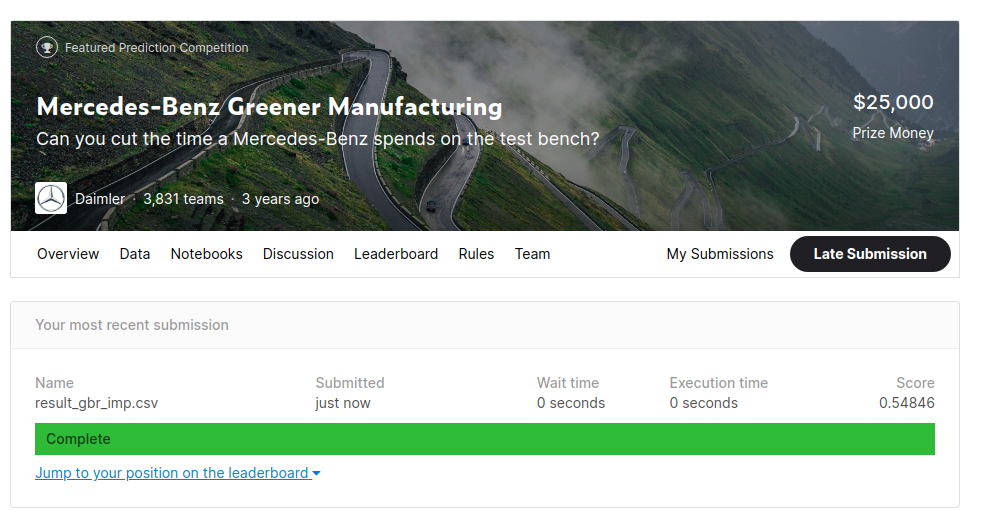

### 3.6.2 GradientBoostingRegressor on all features

In [107]:
# Creating a GradientBoostingRegressor object
clf = GradientBoostingRegressor()

# Hyperparameters
params={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'subsample':[0.1,0.3,0.5,1]
}

# Fitting RandomizedSeachCV to find the best hyperparameters 
random_clf=RandomizedSearchCV(clf,param_distributions=params,verbose=10,n_jobs=-1,cv = 5)
random_clf.fit(train_df, y_train_log)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  3.9min remaining:   51.9s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:  5.3min remaining:   20.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [108]:
random_clf.best_params_

{'subsample': 1, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.03}

In [109]:
# Fitting GradientBoostingRegressor on the best hyperaprameter values obtained from random search on all features
clf_gbr = GradientBoostingRegressor(subsample= 1,n_estimators = 100, max_depth = 3, learning_rate = 0.03)
clf_gbr.fit(train_df, y_train_log)

# Predicting and printing the r2 score for train data
pred = clf_gbr.predict(train_df)
pred = np.round(np.exp(pred),2)
print('Train r2 score:',r2_score(y_train, pred))

Train r2 score: 0.5919370123424696


In [111]:
# Creating a dataframe
result_gbr = pd.DataFrame()
# Predicting the value for test data
pred_test = np.round(np.exp(clf_gbr.predict(test_df)),2)
result_gbr['ID'] = test_df['ID']
result_gbr['y'] = list(pred_test)
# Saving the dataframe into a csv file
result_gbr.to_csv('result_gbr.csv',index=False)

Uploading the csv file to kaggle and the r2 score for test data on this model is 0.54694

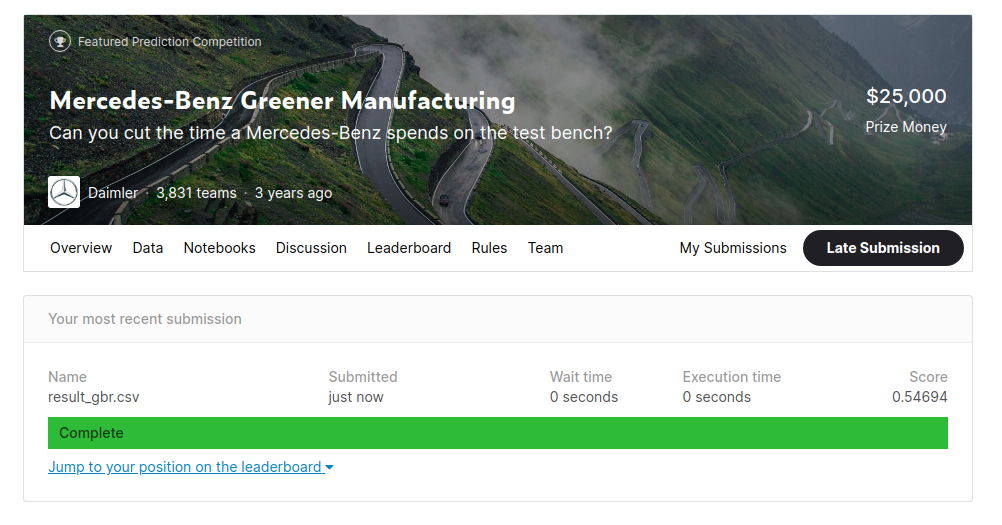

## 3.7 LightGBM

### 3.7.1 LightGBM on Important features

In [127]:
# Creating a LGBMRegressor object
clf = LGBMRegressor()
# Hyperparameter ranges taken from https://www.kaggle.com/c/LANL-Earthquake-Prediction/discussion/89994
# Hyperparameters
params = {
    'num_leaves': list(range(8, 92, 4)),
    'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [3, 4, 5, 6, 8, 12, 16, -1],
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'bagging_freq': [3, 4, 5, 6, 7],
    'bagging_fraction': np.linspace(0.6, 0.95, 10),
    'n_estimators' : [100,200,500,1000,2000],
    'reg_alpha': np.linspace(0.1, 0.95, 10),
    'reg_lambda': np.linspace(0.1, 0.95, 10)
}

# Fitting RandomizedSearchCV to find the best hyperparameters for the model
random_clf=RandomizedSearchCV(clf,param_distributions=params,verbose=10,n_jobs=-1,n_iter = 30,cv = 5)
random_clf.fit(train_df_imp, y_train_log)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   28.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=None,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           silen...
                                                       80, 84, 88],
                                        'reg_alpha': array([0.1     

In [128]:
random_clf.best_params_

{'reg_lambda': 0.8555555555555555,
 'reg_alpha': 0.19444444444444445,
 'num_leaves': 80,
 'n_estimators': 1000,
 'min_data_in_leaf': 60,
 'max_depth': 4,
 'learning_rate': 0.01,
 'bagging_freq': 5,
 'bagging_fraction': 0.6777777777777778}

In [131]:
# Fitting the best hyperparameter values from random search on important features
clf_lgbm_imp = LGBMRegressor(reg_lambda = 0.855,reg_alpha = 0.194, num_leaves = 80, n_estimators = 1000,
                                        min_data_in_leaf = 60, max_depth = 4, learning_rate = 0.01, bagging_freq =5,
                                        bagging_fraction = 0.677)
clf_lgbm_imp.fit(train_df_imp, y_train_log)

# Predicting and printing the r2 score of train data 
pred = clf_lgbm_imp.predict(train_df_imp)
pred = np.round(np.exp(pred),2)
print('Train r2 score:',r2_score(y_train, pred))

Train r2 score: 0.6124791404872684


In [132]:
# Creating a dataframe
result_lgbm_imp = pd.DataFrame()
# Predicting the values for test data 
pred_test = np.round(np.exp(clf_lgbm_imp.predict(test_df_imp)),2)
result_lgbm_imp['ID'] = test_df['ID']
result_lgbm_imp['y'] = list(pred_test)
# Saving the dataframe into a csv file 
result_lgbm_imp.to_csv('result_lgbm_imp.csv',index=False)

Uploading the csv file to kaggle and the r2 score for test data for this model is 0.54475

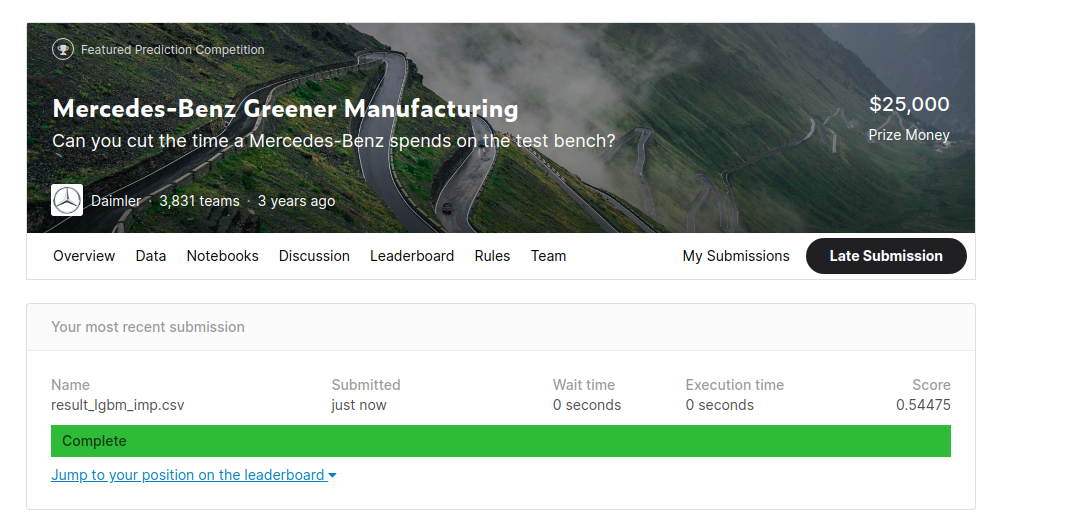

### 3.7.2 LightGBM on all features

In [133]:
# Creating a LGBMRegressor object
clf = LGBMRegressor()
# Hyperparameter ranges taken from https://www.kaggle.com/c/LANL-Earthquake-Prediction/discussion/89994
# Hyperparameters
params = {
    'num_leaves': list(range(8, 92, 4)),
    'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [3, 4, 5, 6, 8, 12, 16, -1],
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'bagging_freq': [3, 4, 5, 6, 7],
    'bagging_fraction': np.linspace(0.6, 0.95, 10),
    'n_estimators' : [100,200,500,1000,2000],
    'reg_alpha': np.linspace(0.1, 0.95, 10),
    'reg_lambda': np.linspace(0.1, 0.95, 10)
}

# Fitting RandomizedSearchCV to find the best hyperparameters for the model
random_clf=RandomizedSearchCV(clf,param_distributions=params,verbose=10,n_jobs=-1,n_iter = 30,cv = 5)
random_clf.fit(train_df, y_train_log)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.7min finished


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] bagging_fraction is set=0.7166666666666667, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7166666666666667


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=None,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           silen...
                                                       80, 84, 88],
                                        'reg_alpha': array([0.1     

In [134]:
random_clf.best_params_

{'reg_lambda': 0.47777777777777775,
 'reg_alpha': 0.8555555555555555,
 'num_leaves': 40,
 'n_estimators': 500,
 'min_data_in_leaf': 60,
 'max_depth': 3,
 'learning_rate': 0.01,
 'bagging_freq': 3,
 'bagging_fraction': 0.7166666666666667}

In [79]:
# Fitting the LGBMRegressor model on the best hyperparameter values 
clf_lgbm = LGBMRegressor(reg_lambda = 0.477,reg_alpha = 0.855, num_leaves = 40, n_estimators = 500,
                        min_data_in_leaf = 60, max_depth = 3, learning_rate = 0.01, bagging_freq =3,
                        bagging_fraction = 0.716)
clf_lgbm.fit(train_df, y_train_log)

# Predicting and printing the r2 score for train data 
pred = clf_lgbm.predict(train_df)
pred = np.round(np.exp(pred),2)
print('Train r2 score:',r2_score(y_train, pred))

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] bagging_fraction is set=0.716, subsample=1.0 will be ignored. Current value: bagging_fraction=0.716
Train r2 score: 0.587489729388545


In [78]:
train_df

ID  X0  X1  X2  X3  X4  X5  X6  X8  X10  ...  X127_plus_X272  \
0        0  37  23  20   0   3  27   9  14    0  ...               0   
1        6  37  21  22   4   3  31  11  14    0  ...               1   
2        7  24  24  38   2   3  30   9  23    0  ...               1   
3        9  24  21  38   5   3  30  11   4    0  ...               1   
4       13  24  23  38   5   3  14   3  13    0  ...               1   
...    ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...             ...   
4204  8405  10  20  19   2   3   1   3  16    0  ...               0   
4205  8406  36  16  44   3   3   1   7   7    0  ...               0   
4206  8412  10  23  42   0   3   1   6   4    0  ...               0   
4207  8415  11  19  29   5   3   1  11  20    0  ...               1   
4208  8417  52  19   5   2   3   1   6  22    0  ...               1   

      X127_plus_X276  X127_plus_X328  X136_plus_X261  X136_plus_X314  \
0                  0               0               1               1   
1                  1               1               1               1   
2                  1               1               0               0   
3                  1               1               0               0   
4                  1               1               0               0   
...              ...             ...             ...             ...   
4204               0               0               2               2   
4205               0               0               1               2   
4206               0               0               2               2   
4207               1               1               1               1   
4208               1               1               1               1   

      X221_plus_X314  X261_plus_X263  X261_plus_X315  X263_plus_X314  \
0                  0               1               0               1   
1                  0               1               0               1   
2                  0               0               0               0   
3                  0               0               0               0   
4                  0               0               0               0   
...              ...             ...             ...             ...   
4204               1               2               1               2   
4205               1               1               0               2   
4206               1               2               1               2   
4207               0               1               0               1   
4208               0               1               0               1   

      X314_plus_X315  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
4204               1  
4205               1  
4206               1  
4207               0  
4208               0  

[4209 rows x 347 columns]

In [80]:
pickle.dump(clf_lgbm,open('lgbm_model.pkl','wb'))

In [137]:
# Creating a dataframe
result_lgbm = pd.DataFrame()
# Predicting the values for test data 
pred_test = np.round(np.exp(clf_lgbm.predict(test_df)),2)
result_lgbm['ID'] = test_df['ID']
result_lgbm['y'] = list(pred_test)
# Saving the dataframe into a csv file 
result_lgbm.to_csv('result_lgbm.csv',index=False)

Uploading the csv file to kaggle we can see that the r2 score for test data is 0.55406

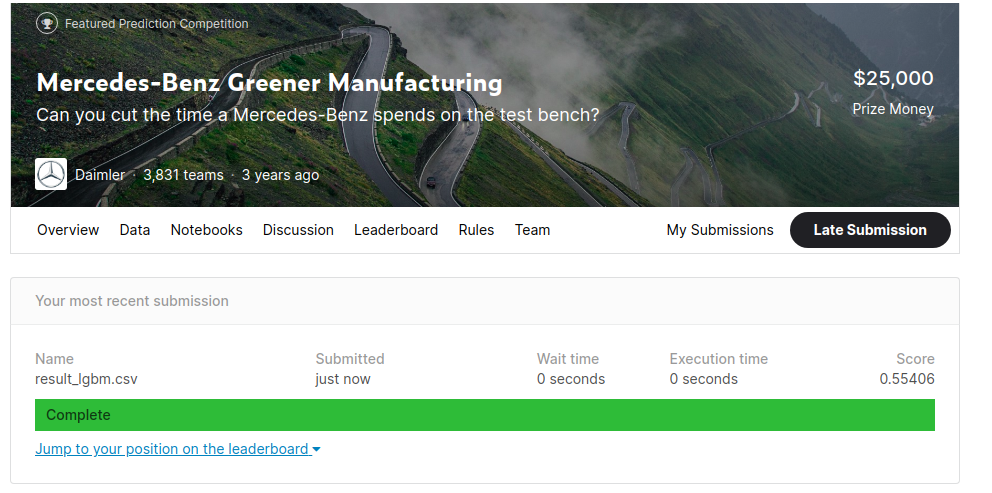

### From these above models we can see that XGBoost model and LightGBM model for all features have given the best results

## Ensemble Models

## 3.8 Ensemble model -1 

### 3.8.1 Ensemble model-1 on Important features and train data 

Splitting the train data into 80-20 and getting 20% of the test data and predicting the test values on 20% of train features

In [82]:
# Splitting the data into train and split 
X_train,X_test,y_train_e,y_test_e = train_test_split(train_df_imp,y_train_log, test_size = 0.2, random_state = 10)

# Splitting the train data into two datasets (50-50)
D1,D2,D1_train,D2_train = train_test_split(X_train,y_train_e,test_size = 0.5, random_state = 10)

In [83]:
# Function which returns k models after randomly sampling and training for train data
def k_model(k,D1,D1_train):
    # Extracting the row_indices for random sampling
    row_indices = np.arange(0,len(D1))
    # Creating a list to store the models
    k_models = []
    # Looping for k models
    for i in range(k):
        # Sampling with replacement and creating X and y datasets
        d_indices = np.random.choice(row_indices,size = len(D1))
        X = D1.iloc[d_indices]
        y = D1_train.iloc[d_indices]
        # Training a decision tree regressor on X and y
        clf = DecisionTreeRegressor(max_depth = 3)
        clf.fit(X,y)
        # Appending the model to the list
        k_models.append(clf)
    # Returning the list of k models
    return k_models

# Calling the function
k_models = k_model(100,D1,D1_train)

In [84]:
# Function to predict using k models
def k_model_predict(k_models,D2):
    # Creating a dataframe to store the predicted values
    predicted = pd.DataFrame()
    # Looping through k models
    for i in range(0,len(k_models)):
        # Predicting using the model and storing it in val variable
        val = k_models[i].predict(D2)
        # Adding the predicted values to the dataframe
        predicted[i] = val
    # Returning the predicted dataframe
    return predicted

# Calling the function
pred = k_model_predict(k_models,D2)

In [85]:
pred

0         1         2         3         4         5         6   \
0     4.531314  4.527474  4.548568  4.548710  4.537179  4.537579  4.541642   
1     4.732786  4.733782  4.715602  4.729663  4.712282  4.731598  4.723390   
2     4.633785  4.634910  4.632910  4.629293  4.635091  4.632458  4.633649   
3     4.531314  4.527474  4.548568  4.548710  4.537179  4.537579  4.541642   
4     4.355312  4.357044  4.341365  4.355682  4.352576  4.340314  4.350930   
...        ...       ...       ...       ...       ...       ...       ...   
1679  4.633785  4.634910  4.632910  4.629293  4.635091  4.632458  4.633649   
1680  4.732786  4.733782  4.715602  4.729663  4.712282  4.731598  4.723390   
1681  4.531314  4.559825  4.548568  4.548710  4.537179  4.537579  4.541642   
1682  4.531314  4.527474  4.548568  4.548710  4.537179  4.537579  4.541642   
1683  4.570575  4.559825  4.548568  4.548710  4.537179  4.537579  4.541642   

            7         8         9   ...        90        91        92  \
0     4.542848  4.548118  4.537248  ...  4.527640  4.533803  4.534845   
1     4.731021  4.729524  4.726908  ...  4.730911  4.713726  4.724237   
2     4.636673  4.634629  4.639023  ...  4.633788  4.632887  4.631142   
3     4.542848  4.548118  4.537248  ...  4.527640  4.555743  4.534845   
4     4.362299  4.334422  4.324018  ...  4.371008  4.347059  4.355551   
...        ...       ...       ...  ...       ...       ...       ...   
1679  4.636673  4.634629  4.639023  ...  4.633788  4.632887  4.631142   
1680  4.731021  4.729524  4.726908  ...  4.730911  4.713726  4.724237   
1681  4.542848  4.548118  4.537248  ...  4.566671  4.533803  4.534845   
1682  4.542848  4.548118  4.537248  ...  4.527640  4.533803  4.534845   
1683  4.542848  4.548118  4.537248  ...  4.566671  4.533803  4.534845   

            93        94        95        96        97        98        99  
0     4.549505  4.532820  4.544374  4.545413  4.544321  4.543832  4.551468  
1     4.730454  4.725098  4.713313  4.716556  4.714925  4.736484  4.726924  
2     4.633681  4.639393  4.633715  4.634255  4.632197  4.634724  4.636053  
3     4.549505  4.532820  4.544374  4.545413  4.544321  4.543832  4.551468  
4     4.350702  4.354675  4.363407  4.324296  4.364744  4.323784  4.344767  
...        ...       ...       ...       ...       ...       ...       ...  
1679  4.633681  4.639393  4.633715  4.634255  4.632197  4.634724  4.636053  
1680  4.730454  4.725098  4.713313  4.716556  4.714925  4.736484  4.726924  
1681  4.549505  4.557029  4.544374  4.545413  4.544321  4.543832  4.551468  
1682  4.549505  4.532820  4.544374  4.545413  4.544321  4.543832  4.551468  
1683  4.549505  4.557029  4.544374  4.545413  4.544321  4.543832  4.551468  

[1684 rows x 100 columns]

In [86]:
meta = XGBRegressor()
meta.fit(pred,D2_train)
print('Train r2 score = ',r2_score(np.exp(meta.predict(pred)),np.exp(D2_train)))

Train r2 score =  0.4560993109685476


In [87]:
pred_test = k_model_predict(k_models,X_test)
print('Test r2 score = ',r2_score(np.exp(meta.predict(pred_test)),np.exp(y_test_e)))

Test r2 score =  0.22210701647880948


### 3.8.2 Ensemble Models on Important features and train and test data

Training the ensemble model on important train features and predicting the features on test data and uploading the results to kaggle to get the test score

In [88]:
# Splitting the train data into two datasets (50-50)
D1,D2,D1_train,D2_train = train_test_split(train_df_imp,y_train_log,test_size = 0.5, random_state = 10)

In [89]:
# Using the k_model and k_model_predict functions that have been created previously to train and predict using k models
k_models = k_model(100,D1,D1_train)
pred = k_model_predict(k_models,D2)

# Meta model 
meta = XGBRegressor()
meta.fit(pred,D2_train)
print('Train r2 score = ',r2_score(np.exp(meta.predict(pred)),np.exp(D2_train)))

Train r2 score =  0.2580362304995526


In [90]:
# Predicting for test data 
pred_test = k_model_predict(k_models,test_df_imp)
predicted_y = np.exp(meta.predict(pred_test))

# Creating a dataframe
result_ensemble_imp = pd.DataFrame()
result_ensemble_imp['ID'] = test_df['ID']
result_ensemble_imp['y'] = list(predicted_y)
# Saving the dataframe into a csv file 
result_ensemble_imp.to_csv('result_ensemble_imp.csv',index=False)

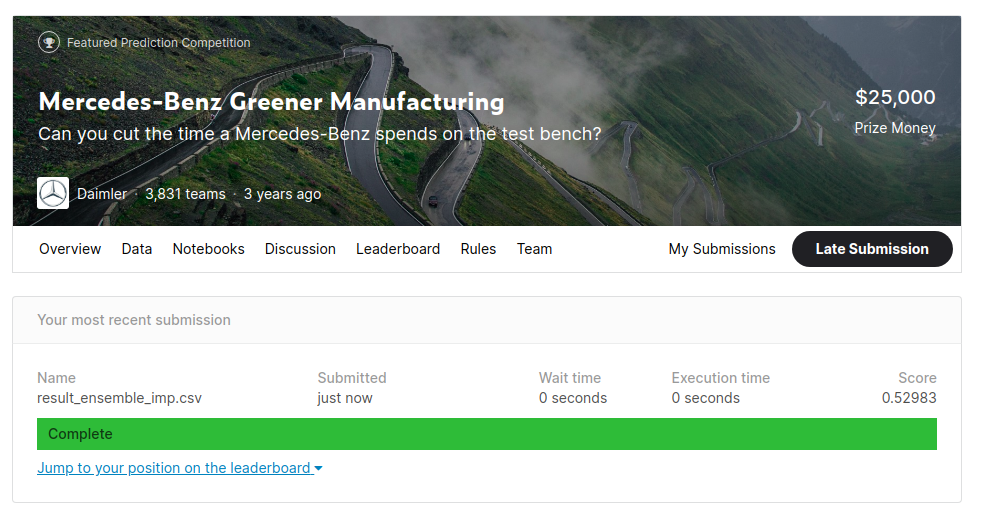

### 3.8.3 Ensemble models on all features and train data 

Training a ensemble model for all features and splitting the train data into 80-20 and training the model using 80% of the data and predicting the results using 20% of the data

In [91]:
# Splitting the data into train and split 
X_train,X_test,y_train_e,y_test_e = train_test_split(train_df,y_train_log, test_size = 0.2, random_state = 10)

# Splitting the train data into two datasets (50-50)
D1,D2,D1_train,D2_train = train_test_split(X_train,y_train_e,test_size = 0.5, random_state = 10)

In [92]:
# Using the k_model and k_model_predict functions that have been created previously to train and predict using k models
k_models = k_model(100,D1,D1_train)
pred = k_model_predict(k_models,D2)

# Meta model 
meta = XGBRegressor()
meta.fit(pred,D2_train)
print('Train r2 score = ',r2_score(np.exp(meta.predict(pred)),np.exp(D2_train)))

Train r2 score =  0.557991807758383


In [93]:
# Predicting the results on 20% of train data which is not used to train the model and computing the r2_score
pred_test = k_model_predict(k_models,X_test)
print('Test r2 score = ',r2_score(np.exp(meta.predict(pred_test)),np.exp(y_test_e)))

Test r2 score =  0.24446578502622662


### 3.8.4 Ensemble model on all features and train and test data

Training the ensemble model on all train features and predicting the features on test data and uploading the results to kaggle to get the test score

In [94]:
# Splitting the train data into two datasets (50-50)
D1,D2,D1_train,D2_train = train_test_split(train_df,y_train_log,test_size = 0.5, random_state = 10)

In [95]:
# Using the k_model and k_model_predict functions that have been created previously to train and predict using k models
k_models = k_model(100,D1,D1_train)
pred = k_model_predict(k_models,D2)

# Meta model 
meta = XGBRegressor()
meta.fit(pred,D2_train)
print('Train r2 score = ',r2_score(np.exp(meta.predict(pred)),np.exp(D2_train)))

Train r2 score =  0.35104767396651826


In [96]:
# Predicting for test data 
pred_test = k_model_predict(k_models,test_df)
predicted_y = np.exp(meta.predict(pred_test))

# Creating a dataframe
result_ensemble = pd.DataFrame()
result_ensemble['ID'] = test_df['ID']
result_ensemble['y'] = list(predicted_y)
# Saving the dataframe into a csv file 
result_ensemble.to_csv('result_ensemble.csv',index=False)

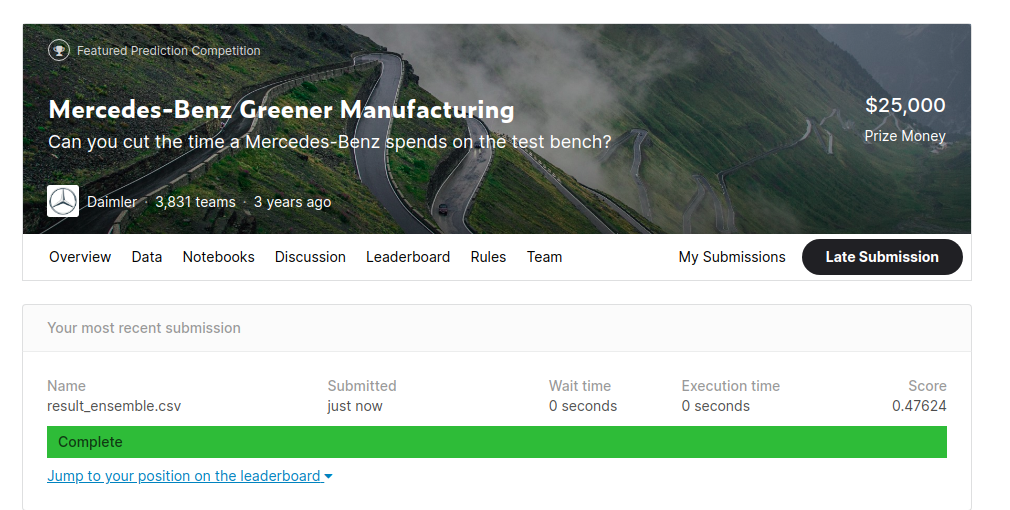